In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# from sklearn.tree import plot_tree, export_text, export_graphviz
# from IPython.display import Image  
# import pydotplus

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif

import warnings
warnings.filterwarnings('ignore')

## Dataset description

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification?datasetId=916586&searchQuery=mlp

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

1 - Normal
2 - Suspect
3 - Pathological

In [ ]:
url='https://drive.google.com/file/d/1LaafegKhr3ew404FP_J7m7ofeQtWAG45/view?usp=share_link'
df = pd.read_csv('https://drive.google.com/uc?id=' + url.split('/')[-2])
df


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
df.shape

(2126, 22)

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


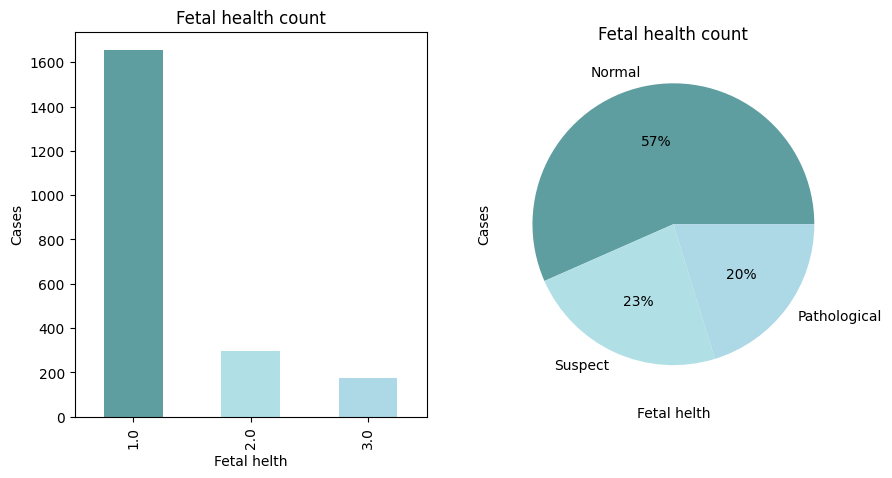

In [ ]:
total = df["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(df["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
vis_fetal_health = df.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")

plt.subplot(122)
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")

plt.show()

In [ ]:
def plot_missing_values_bar(df):
    plt.figure(figsize=(25, 10))
    missing_values = df.isnull().mean().sort_values(ascending=False)
    missing_values.plot(kind='bar', color='blue')
    plt.title("Percentage of Missing Values in Each Column (Sorted in Descending Order)", fontsize=20)
    plt.xlabel("Column", fontsize=15)
    plt.ylabel("Percentage of Missing Values", fontsize=15)
    plt.xticks(rotation=60, fontsize=12)
    plt.yticks(fontsize=12)

    for i in range(df.shape[1]):
        plt.text(x=i, y=missing_values[i], s='{:.2f}%'.format(100*missing_values[i]), ha='center', va='bottom', fontsize=12)

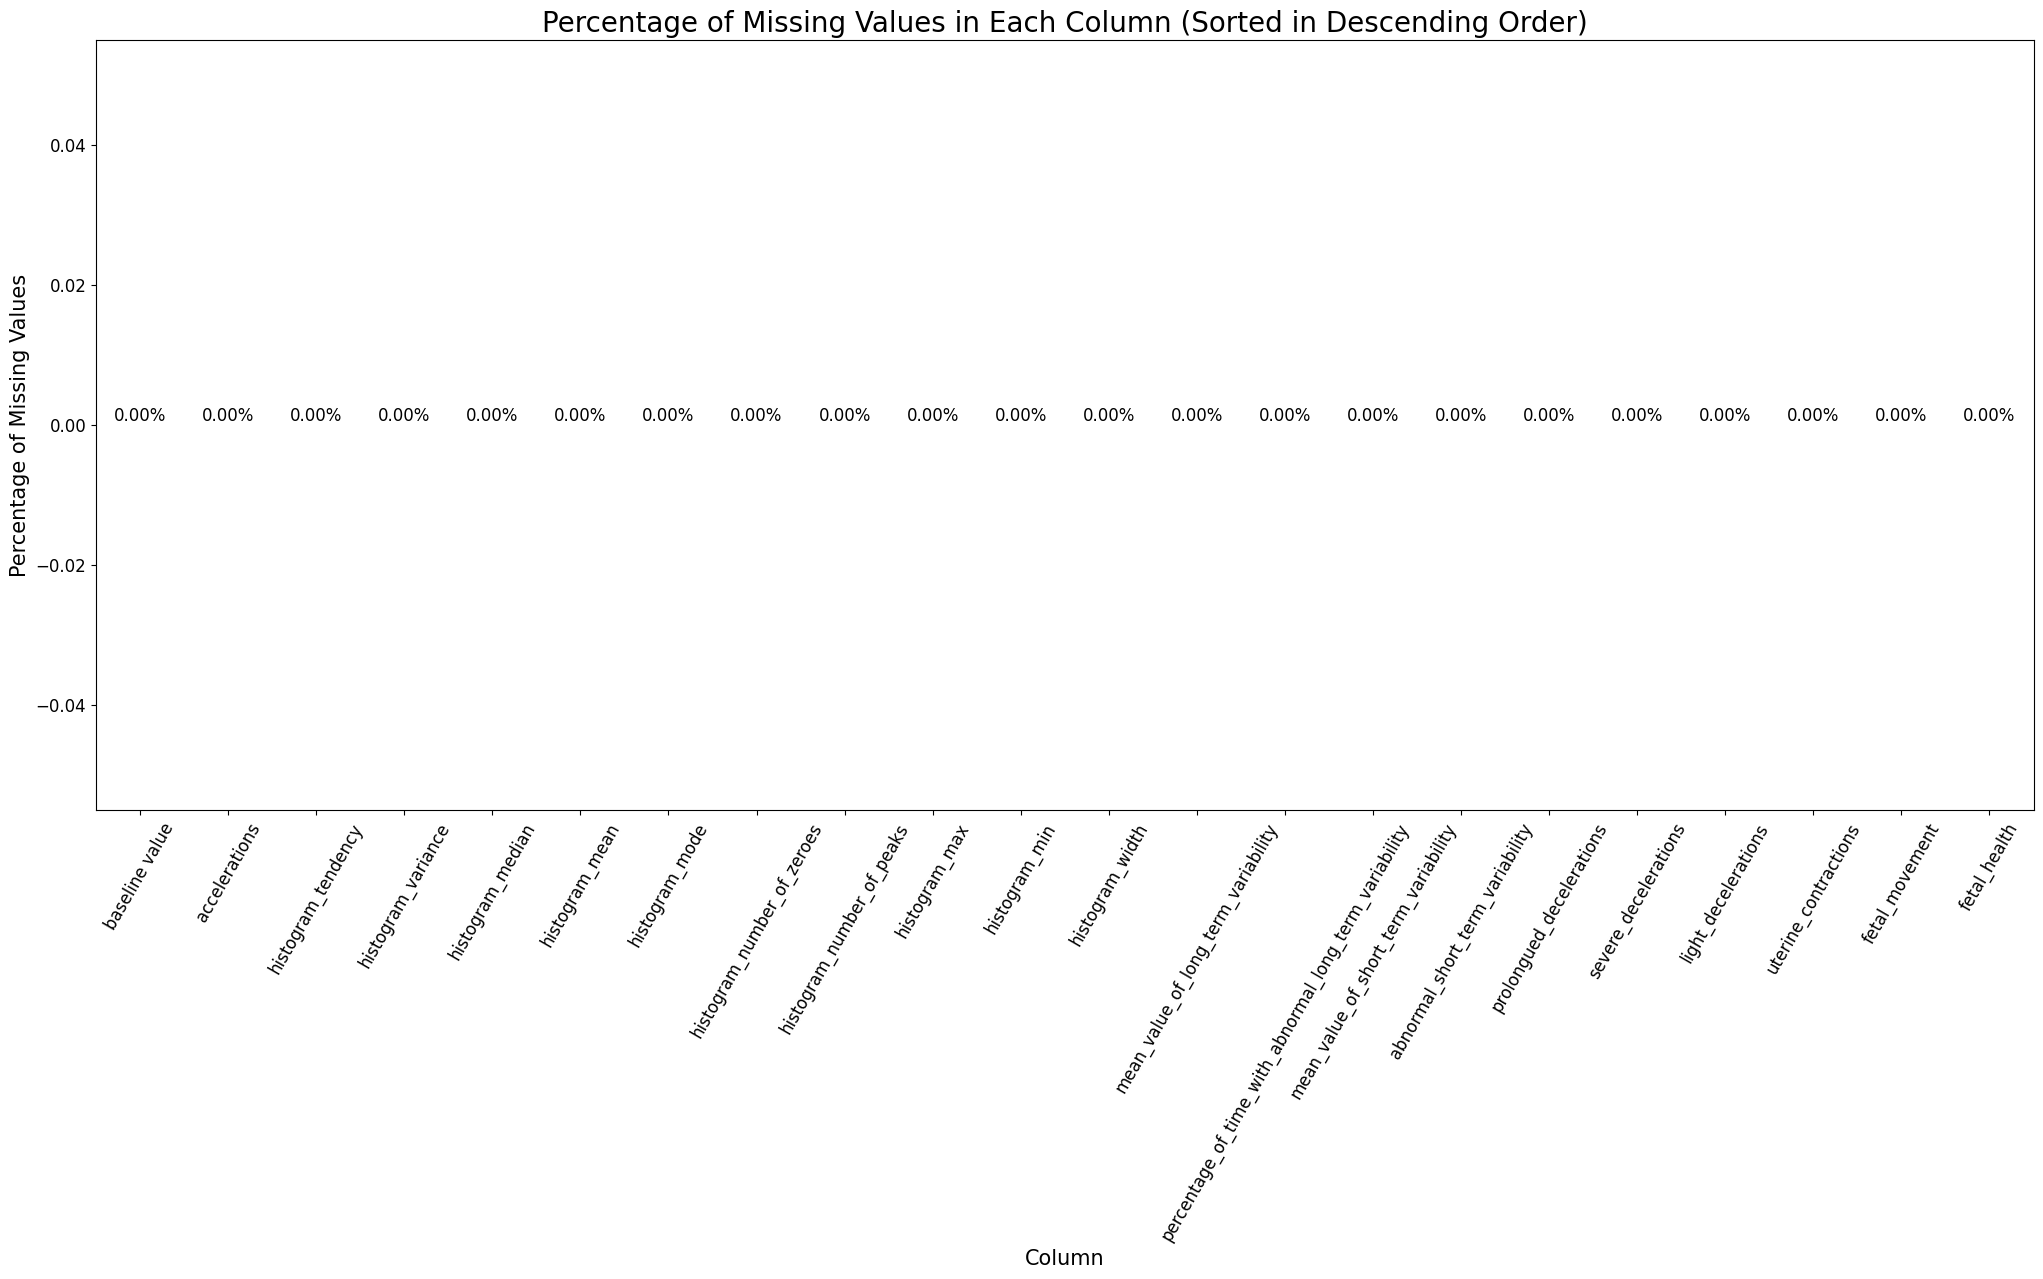

In [ ]:
plot_missing_values_bar(df)

So, there are no missing values in this dataset

Target variable is the fetal_health column

## Feature selection
Use Pearsons correlation and KBest feature selection

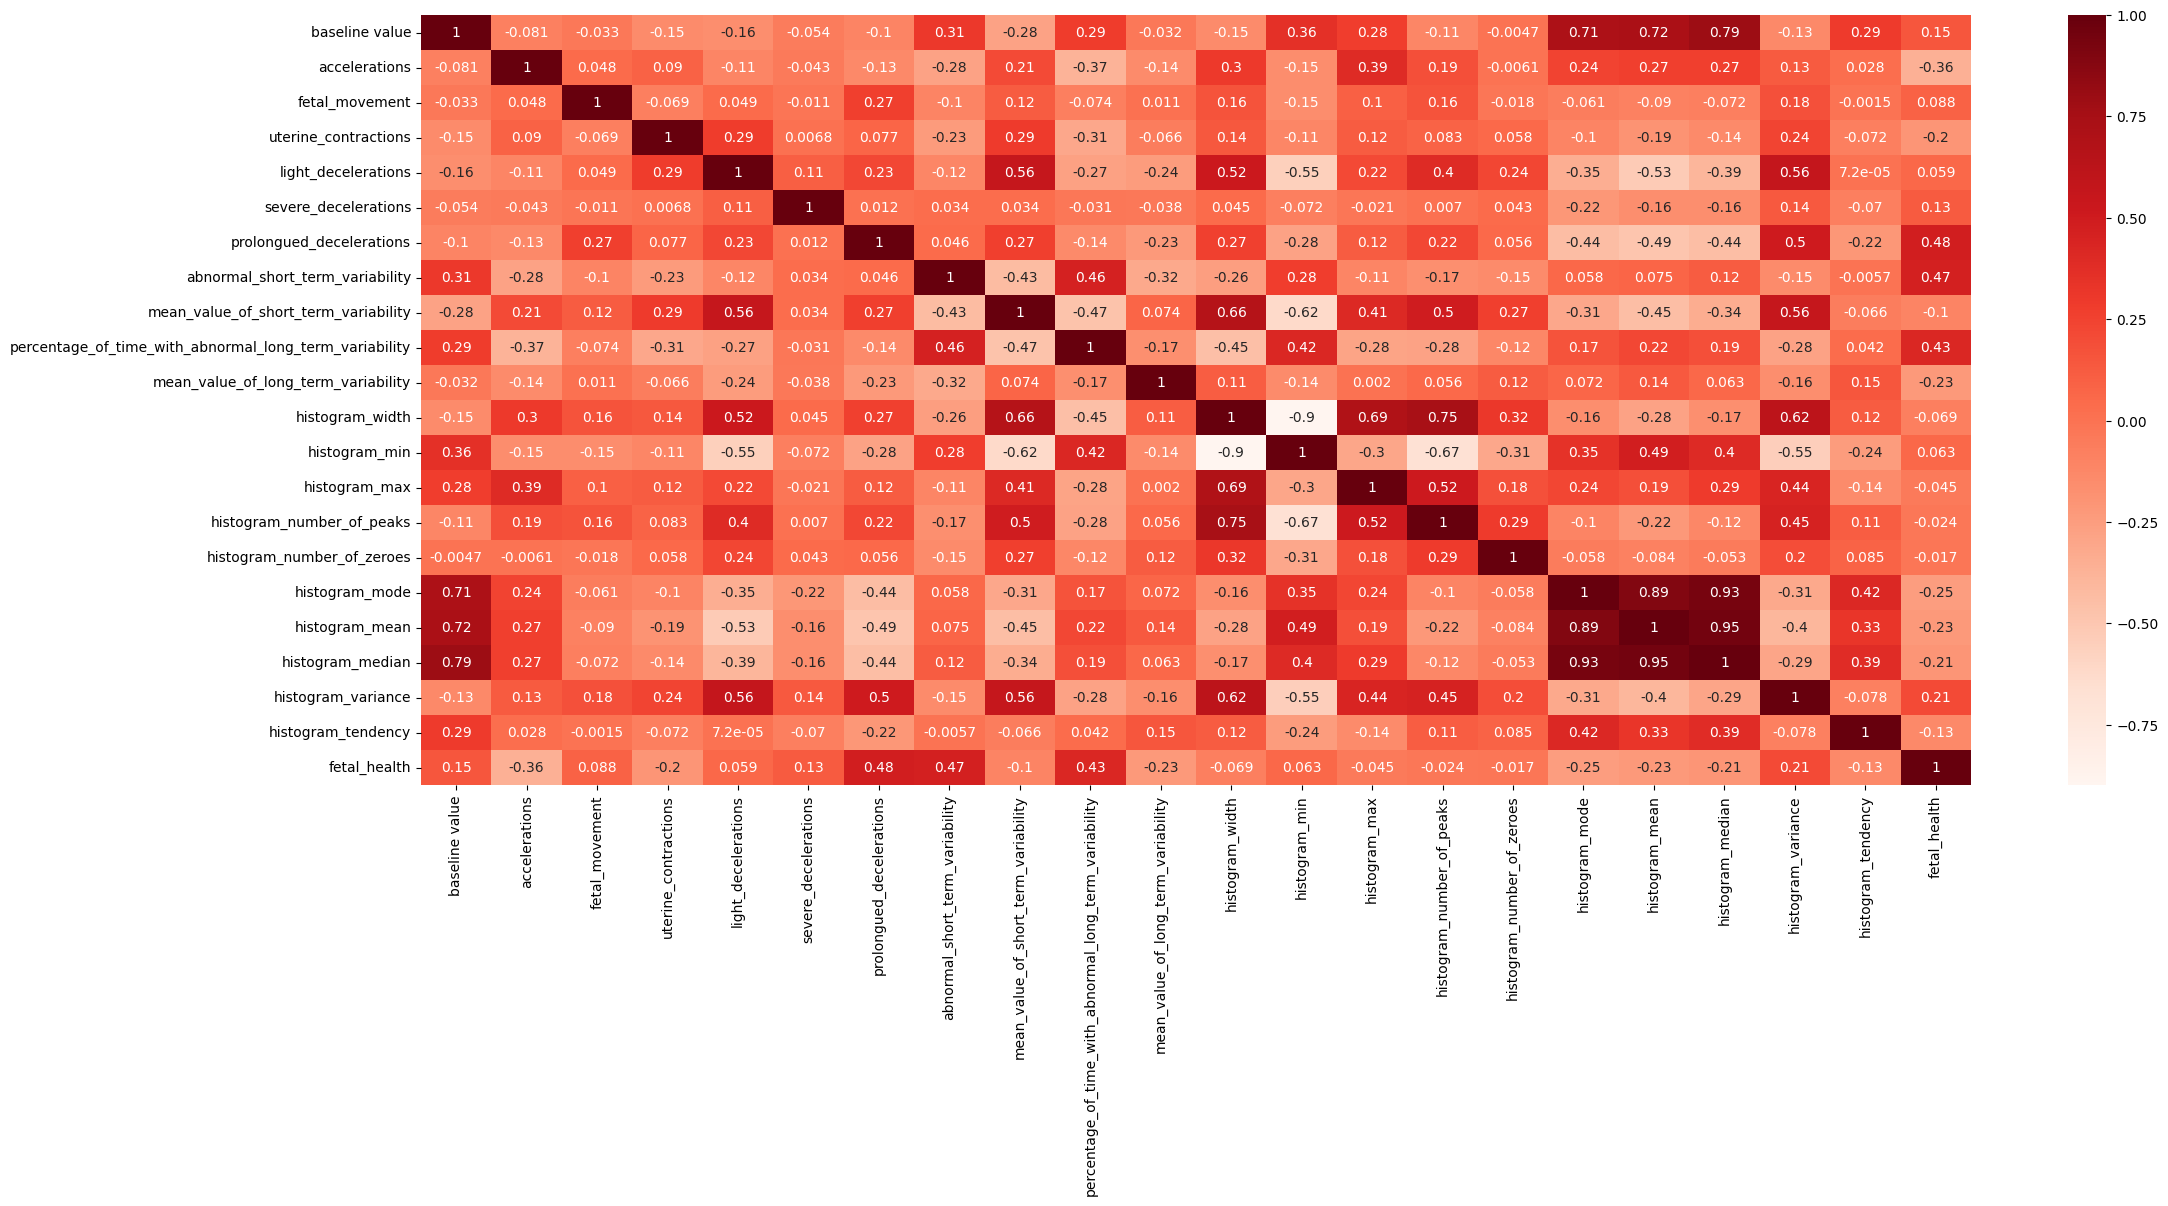

In [ ]:
#Using Pearson Correlation

plt.figure(figsize=(25,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
ordered_corr = pd.DataFrame(abs(cor['fetal_health']).sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')
ordered_corr

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
accelerations,0.364066
histogram_mode,0.250412
histogram_mean,0.226985
mean_value_of_long_term_variability,0.226797
histogram_variance,0.206630
histogram_median,0.205033


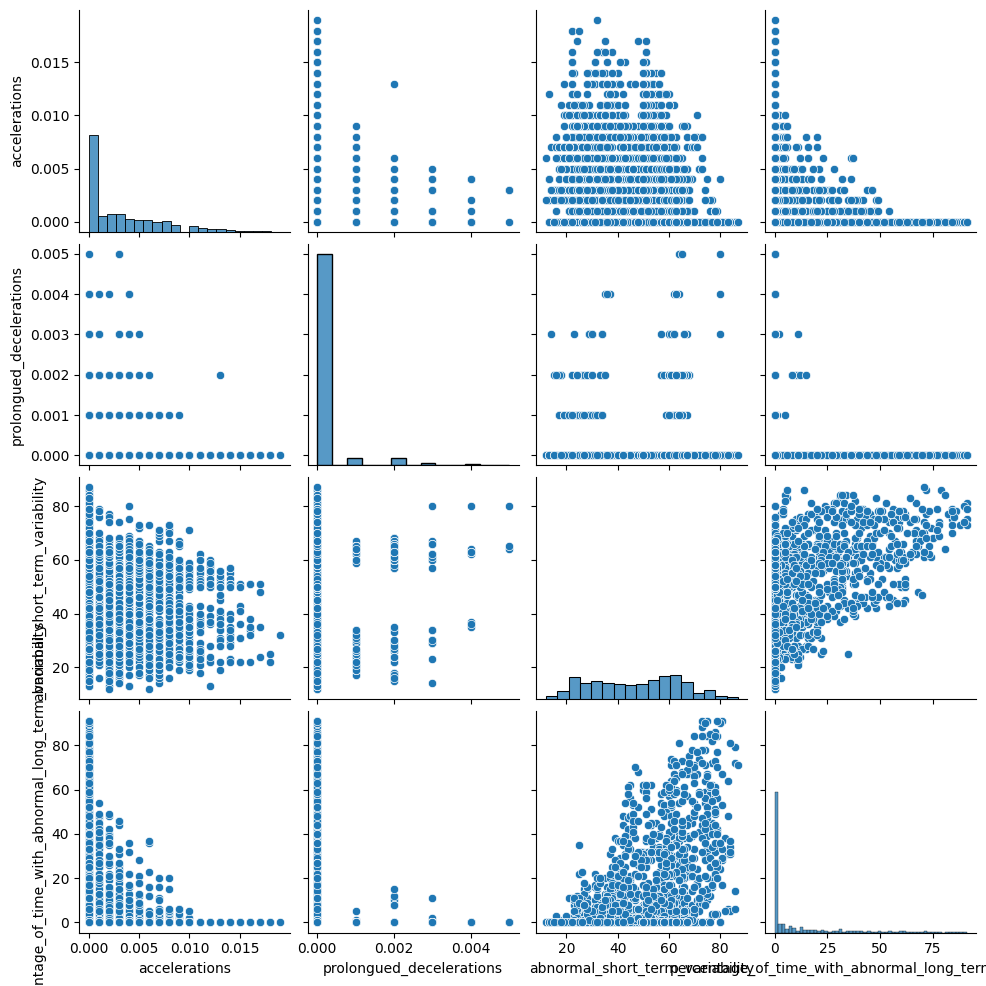

In [ ]:
sns.pairplot(data=df, vars=['accelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability', 
       'percentage_of_time_with_abnormal_long_term_variability'])

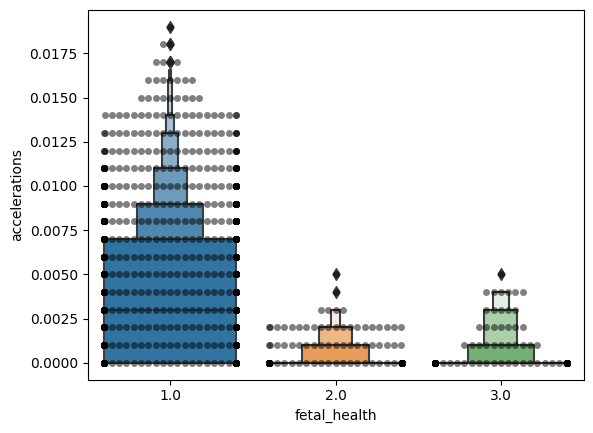

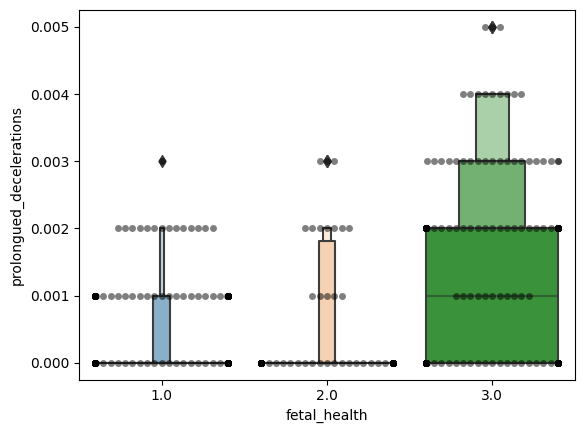

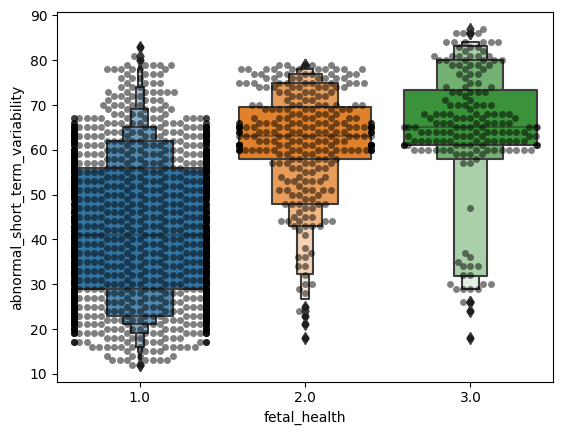

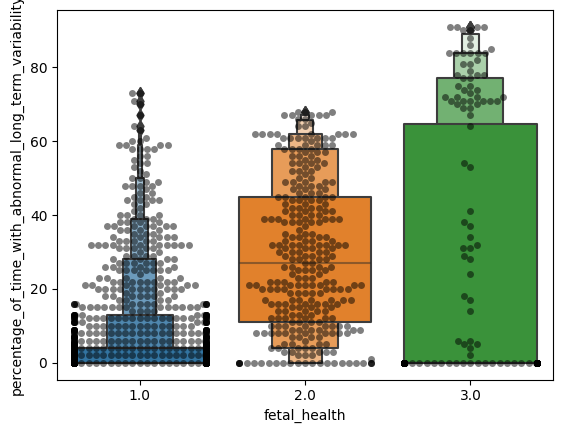

In [ ]:
# Outliers
# columns for detailed visualisation
cols=['accelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability', 
       'percentage_of_time_with_abnormal_long_term_variability']

for i in cols:
    sns.swarmplot(x=df["fetal_health"], y=df[i], color="black", alpha=0.5 )
    sns.boxenplot(x=df["fetal_health"], y=df[i])
    plt.show()

In [ ]:
y = df['fetal_health']
X = df.drop(['histogram_width', 'histogram_min', 'histogram_max','histogram_mode','histogram_mean', 'histogram_median', 'histogram_variance',
             'histogram_number_of_peaks',    
             'histogram_number_of_zeroes', 'histogram_tendency', 'fetal_health'], 1)

In [ ]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0


In [ ]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

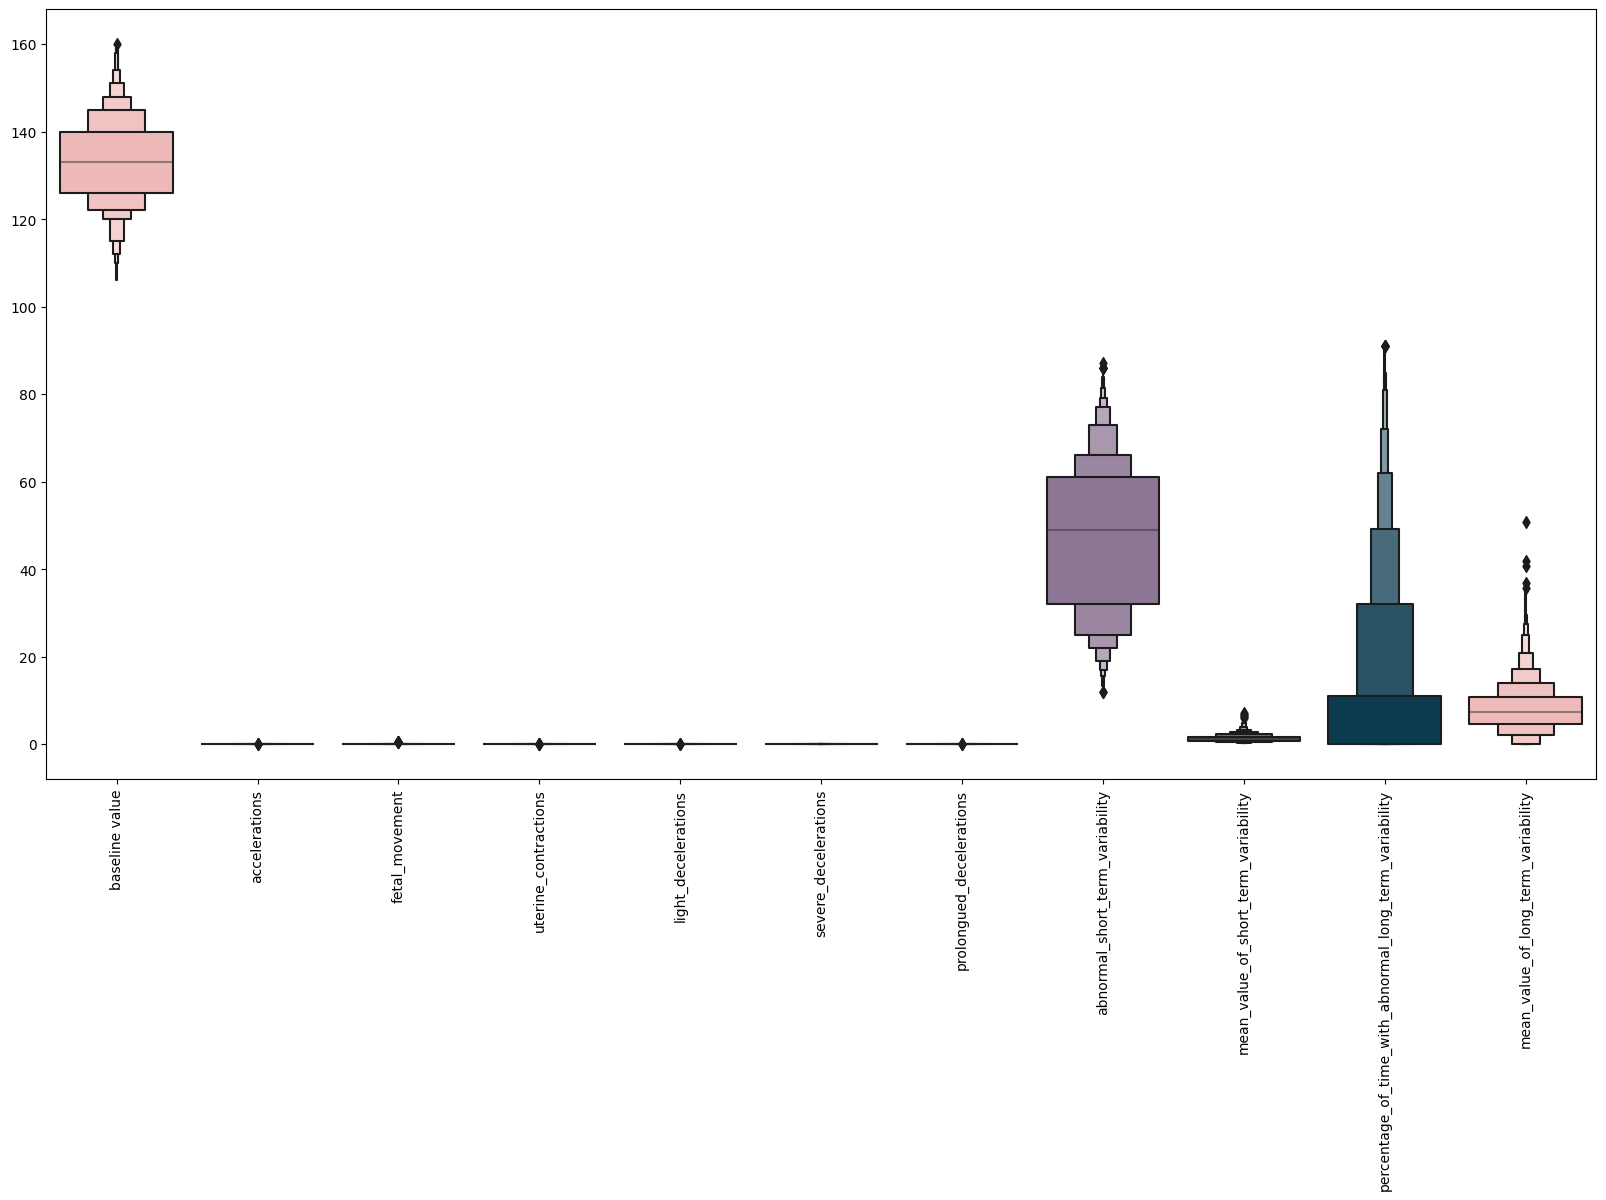

In [ ]:
# range of our feature attributes

shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X,palette = shades)
plt.xticks(rotation=90)
plt.show()

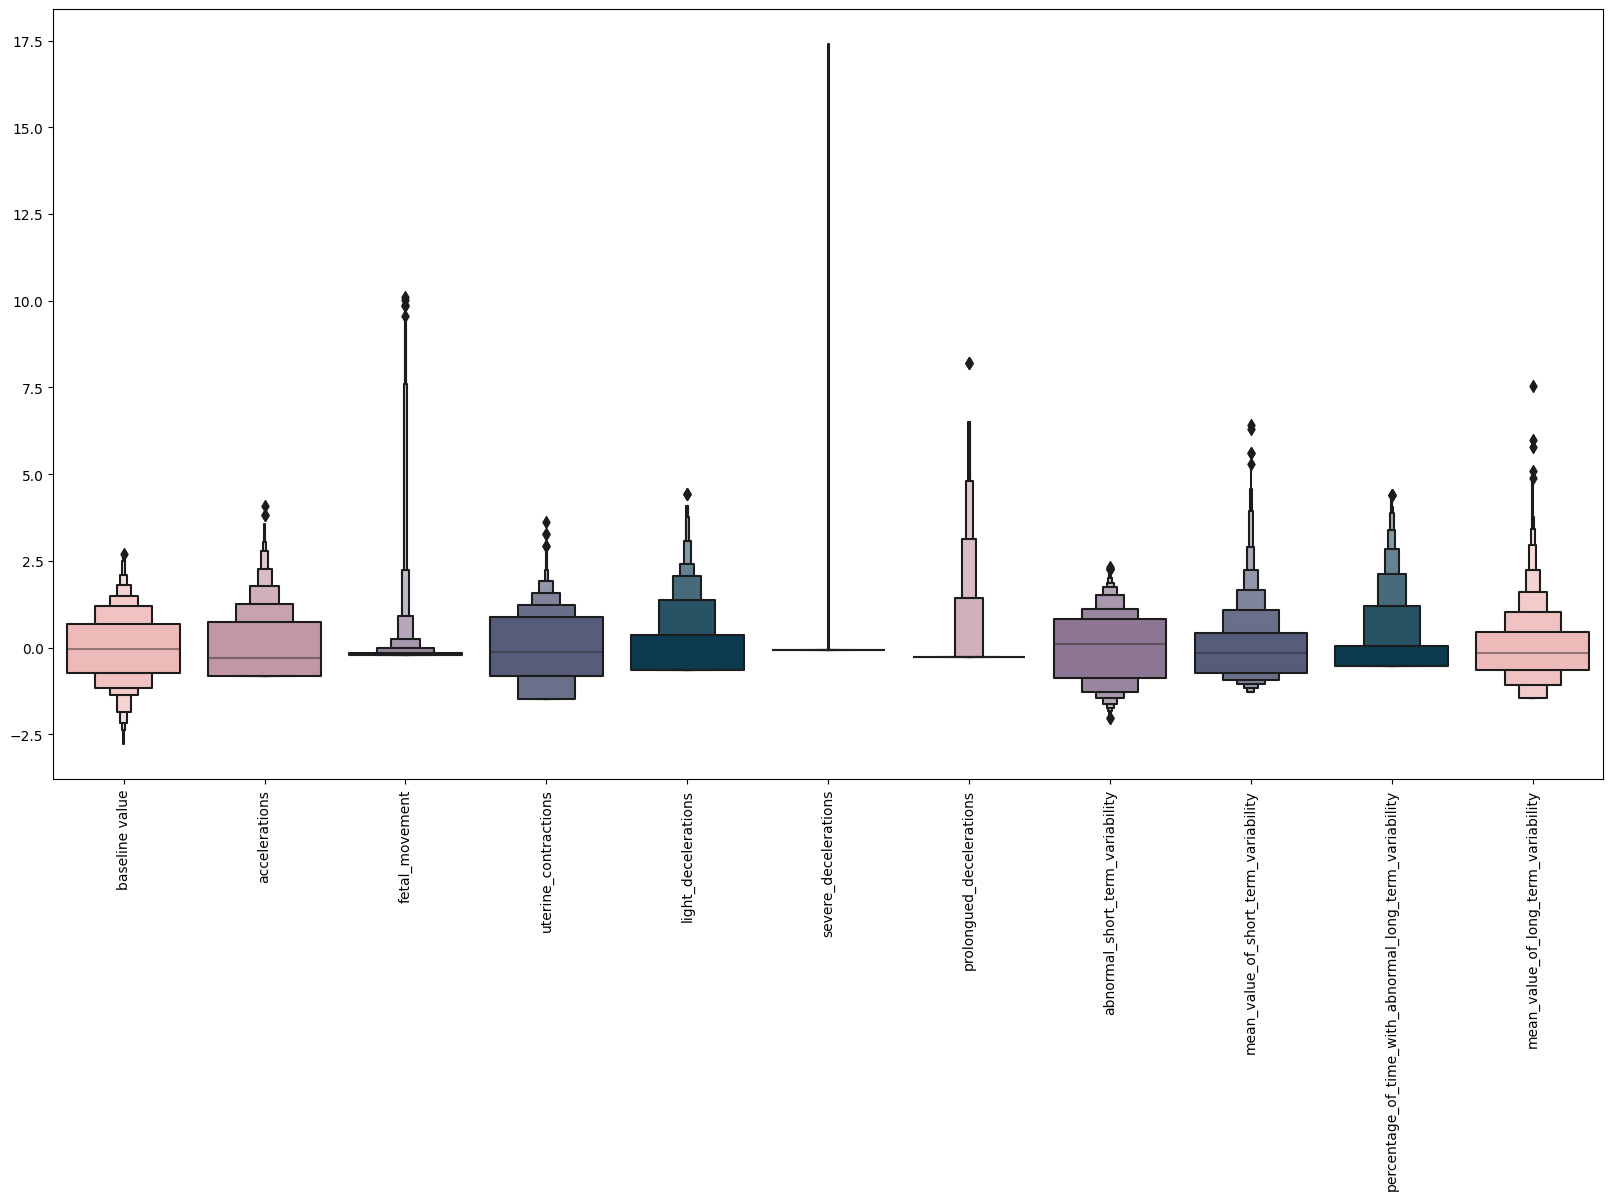

In [ ]:
# scale to the same range

col_names = list(X.columns)
s_scaler = StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   

plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

## Model training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=46)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (1700, 11)
X_test:  (426, 11)
y_train:  (1700,)
y_test:  (426,)


## Logistic Regression

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_best_classification = classification_report(y_test, y_test_pred)
print(rf_best_classification)

Training score: 0.8876470588235295
Test score: 0.8732394366197183
RMSE: 0.411113225896519
Model accuracy on testing set:  0.8732394366197183
Model accuracy on training set:  0.8876470588235295
Model precision on test set: 0.87
Model recall on test set: 0.87
              precision    recall  f1-score   support

         1.0       0.93      0.94      0.94       335
         2.0       0.55      0.57      0.56        53
         3.0       0.79      0.71      0.75        38

    accuracy                           0.87       426
   macro avg       0.76      0.74      0.75       426
weighted avg       0.87      0.87      0.87       426



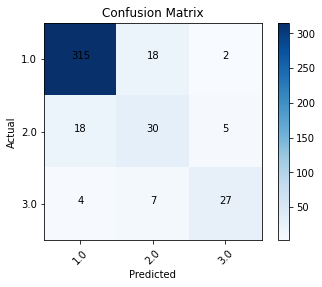

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
parameters = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

clf = GridSearchCV(LogisticRegression(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_solver', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['solver'])
print("Best: %f" % clf.best_score_)

  param_solver  mean_test_score  mean_train_score
0        lbfgs         0.878824          0.890441
1    liblinear         0.877647          0.885735
2    newton-cg         0.878824          0.890441
3          sag         0.878824          0.890588
4         saga         0.878824          0.890294
Best parameters set found on development set:
lbfgs
Best: 0.878824


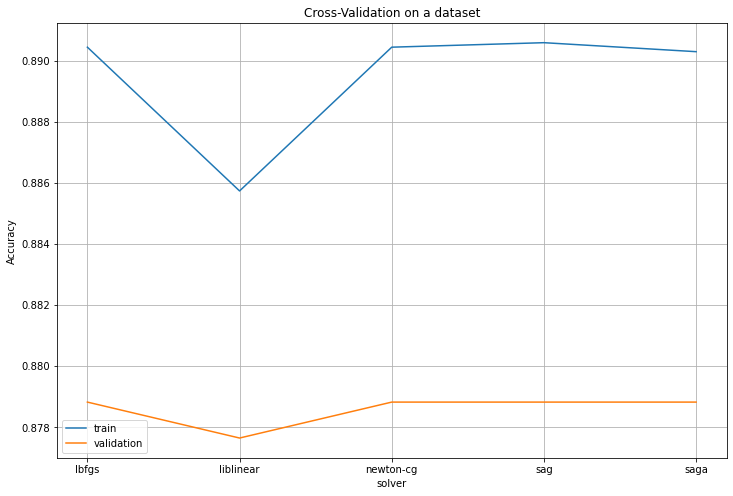

In [ ]:
index = np.arange(1, 6)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('solver')
plt.xticks(index, result['param_solver'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters = {
    'solver': ['lbfgs'],
    'C': np.logspace(-3,5,10),
}

clf = GridSearchCV(LogisticRegression(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_C', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['C'])
print("Best: %f" % clf.best_score_)

       param_C  mean_test_score  mean_train_score
0        0.001         0.782353          0.781471
1     0.007743         0.868235          0.872353
2     0.059948         0.884118          0.886912
3     0.464159         0.880000          0.890000
4     3.593814         0.878235          0.889265
5    27.825594         0.877647          0.889265
6   215.443469         0.877647          0.889265
7  1668.100537         0.877647          0.889265
8  12915.49665         0.877647          0.889265
9     100000.0         0.877647          0.889265
Best parameters set found on development set:
0.05994842503189409
Best: 0.884118


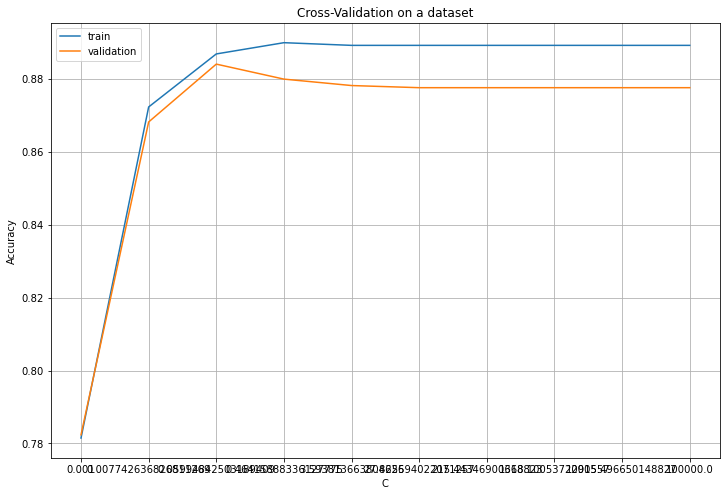

In [ ]:
index = np.arange(1, 11)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.xticks(index, result['param_C'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
model = LogisticRegression(C=0.05994842503189409, solver='lbfgs').fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_best_classification = classification_report(y_test, y_test_pred)
print(rf_best_classification)

Training score: 0.8864705882352941
Test score: 0.8755868544600939
RMSE: 0.3906176642503679
Model accuracy on testing set:  0.8755868544600939
Model accuracy on training set:  0.8864705882352941
Model precision on test set: 0.87
Model recall on test set: 0.88
              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       335
         2.0       0.54      0.51      0.52        53
         3.0       0.87      0.68      0.76        38

    accuracy                           0.88       426
   macro avg       0.78      0.72      0.74       426
weighted avg       0.87      0.88      0.87       426



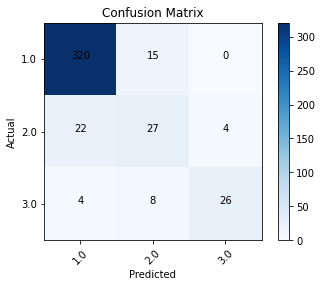

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Global Optimization

In [ ]:
parameters = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'C': np.logspace(-3,5,10),
}

clf = GridSearchCV(LogisticRegression(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'C': 0.05994842503189409, 'solver': 'lbfgs'}


In [ ]:
model = LogisticRegression(C=0.05994842503189409, solver='lbfgs')
model.fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_best_classification = classification_report(y_test, y_test_pred)
print(rf_best_classification)

Training score: 0.8864705882352941
Test score: 0.8755868544600939
RMSE: 0.3906176642503679
Model accuracy on testing set:  0.8755868544600939
Model accuracy on training set:  0.8864705882352941
Model precision on test set: 0.87
Model recall on test set: 0.88
              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       335
         2.0       0.54      0.51      0.52        53
         3.0       0.87      0.68      0.76        38

    accuracy                           0.88       426
   macro avg       0.78      0.72      0.74       426
weighted avg       0.87      0.88      0.87       426



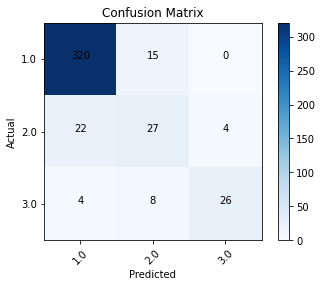

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Feature Importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Feature: 0, Score: -0.30943
Feature: 1, Score: 0.81886
Feature: 2, Score: -0.12883
Feature: 3, Score: 0.32517
Feature: 4, Score: -0.14897
Feature: 5, Score: -0.07664
Feature: 6, Score: -0.76226
Feature: 7, Score: -0.79699
Feature: 8, Score: 0.03370
Feature: 9, Score: -0.50738
Feature: 10, Score: -0.00876


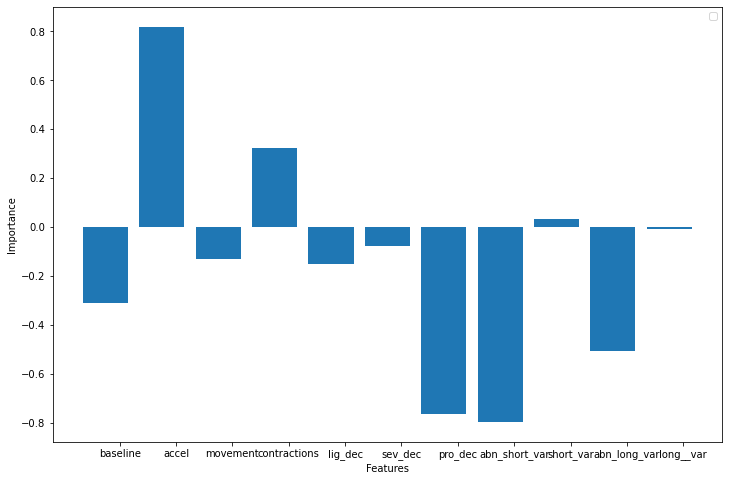

In [ ]:
importance = model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

barWidth = 0.25
fig = plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks([r + barWidth for r in range(11)],
        ['baseline', 'accel', 'movement',
       'contractions', 'lig_dec', 'sev_dec',
       'pro_dec', 'abn_short_var',
       'short_var',
       'abn_long_var',
       'long__var'])

plt.legend()
plt.show()

In [ ]:
coeff = pd.DataFrame({'coeff': model.coef_[0]}, index=X.columns)
coeff.sort_values(by=['coeff'], ascending=False)

,coeff
accelerations,0.818862
uterine_contractions,0.325173
mean_value_of_short_term_variability,0.033701
mean_value_of_long_term_variability,-0.008757
severe_decelerations,-0.076636
fetal_movement,-0.128834
light_decelerations,-0.148966
baseline value,-0.309434
percentage_of_time_with_abnormal_long_term_variability,-0.507377
prolongued_decelerations,-0.762256


In [ ]:
coeff = pd.DataFrame({'coeff': abs(model.coef_[0])}, index=X.columns)
coeff.sort_values(by=['coeff'], ascending=False)

,coeff
accelerations,0.818862
abnormal_short_term_variability,0.796987
prolongued_decelerations,0.762256
percentage_of_time_with_abnormal_long_term_variability,0.507377
uterine_contractions,0.325173
baseline value,0.309434
light_decelerations,0.148966
fetal_movement,0.128834
severe_decelerations,0.076636
mean_value_of_short_term_variability,0.033701


In [ ]:
SOC_logistic = 22

## Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier().fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

dt_classification = classification_report(y_test, y_test_pred)
print(dt_classification)

Training score: 0.9988235294117647
Test score: 0.931924882629108
RMSE: 0.2986668343393225
Model accuracy on testing set:  0.931924882629108
Model accuracy on training set:  0.9988235294117647
Model precision on test set: 0.93
Model recall on test set: 0.93
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       335
         2.0       0.79      0.70      0.74        53
         3.0       0.94      0.89      0.92        38

    accuracy                           0.93       426
   macro avg       0.89      0.86      0.87       426
weighted avg       0.93      0.93      0.93       426



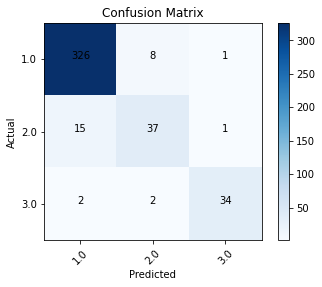

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
parameters={
    'criterion': ['gini', 'entropy'],
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_criterion', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['criterion'])
print("Best: %f" % clf.best_score_)

  param_criterion  mean_test_score  mean_train_score
0            gini         0.908235          0.999118
1         entropy         0.902941          0.999118
Best parameters set found on development set:
gini
Best: 0.908235


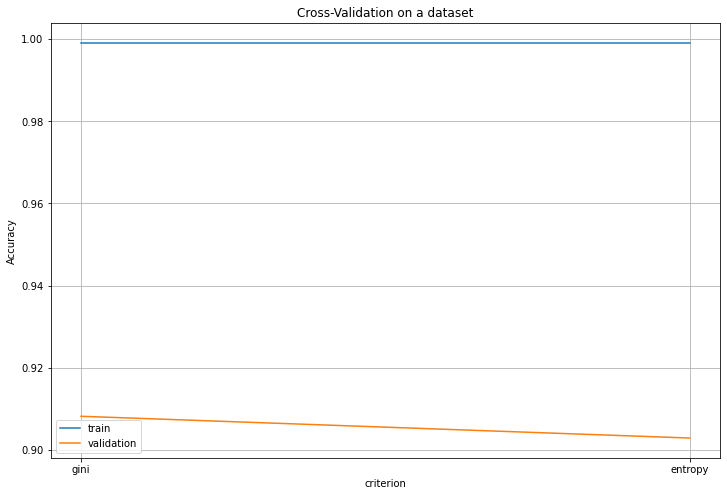

In [ ]:
index = np.arange(1, 3)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('criterion')
plt.xticks(index, result['param_criterion'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters={
    'max_depth': [1,2,3,4,5,6,7,8,9,10,20,30],
    'criterion': ['gini']
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_max_depth', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['max_depth'])
print("Best: %f" % clf.best_score_)

   param_max_depth  mean_test_score  mean_train_score
0                1         0.826471          0.826471
1                2         0.873529          0.873529
2                3         0.886471          0.893971
3                4         0.901176          0.916618
4                5         0.908235          0.936765
5                6         0.910588          0.948382
6                7         0.907647          0.959706
7                8         0.907647          0.971324
8                9         0.911176          0.978824
9               10         0.905882          0.984412
10              20         0.908235          0.999118
11              30         0.910000          0.999118
Best parameters set found on development set:
9
Best: 0.911176


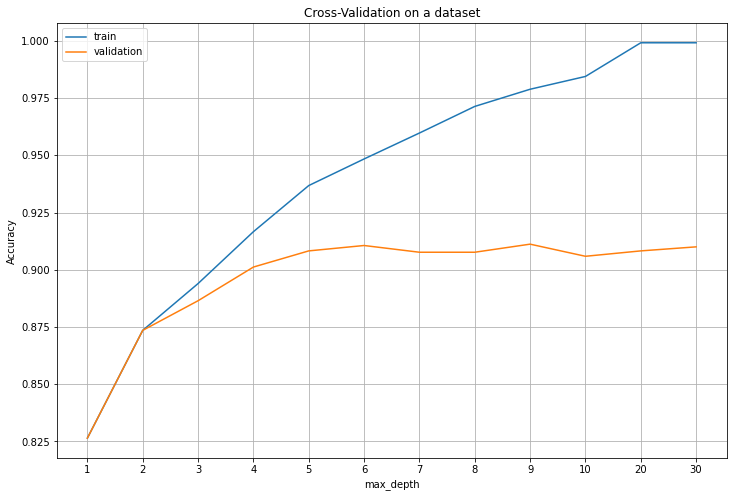

In [ ]:
index = np.arange(1, 13)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.xticks(index, result['param_max_depth'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters={
    'criterion': ['gini'],
    'max_depth': [9],
    'min_samples_leaf': [5,10,20,30,40,50,100] 
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_min_samples_leaf', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['min_samples_leaf'])
print("Best: %f" % clf.best_score_)

  param_min_samples_leaf  mean_test_score  mean_train_score
0                      5         0.903529          0.950294
1                     10         0.905294          0.933971
2                     20         0.892941          0.913529
3                     30         0.894118          0.895882
4                     40         0.879412          0.887206
5                     50         0.866471          0.872647
6                    100         0.831176          0.831176
Best parameters set found on development set:
10
Best: 0.905294


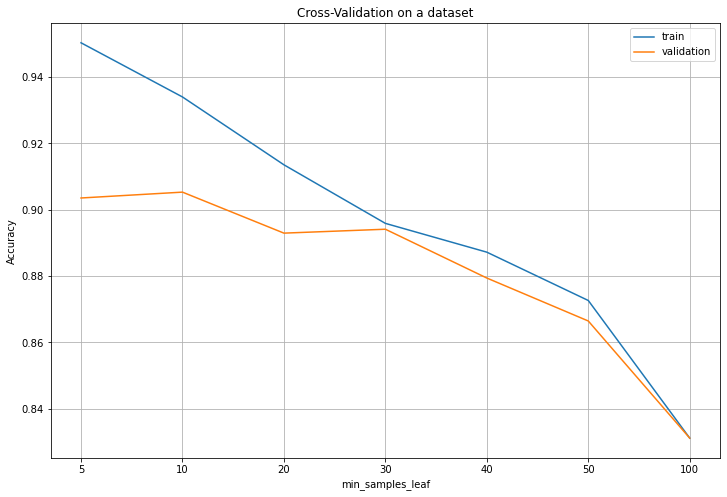

In [ ]:
index = np.arange(1, 8)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leaf')
plt.xticks(index, result['param_min_samples_leaf'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, criterion='gini').fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

dt_best_classification = classification_report(y_test, y_test_pred)
print(dt_best_classification)

Training score: 0.9358823529411765
Test score: 0.9154929577464789
RMSE: 0.37529331252040077
Model accuracy on testing set:  0.9154929577464789
Model accuracy on training set:  0.9358823529411765
Model precision on test set: 0.91
Model recall on test set: 0.92
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       335
         2.0       0.77      0.68      0.72        53
         3.0       0.89      0.87      0.88        38

    accuracy                           0.92       426
   macro avg       0.87      0.84      0.85       426
weighted avg       0.91      0.92      0.91       426



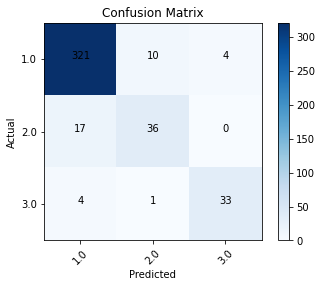

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Global Optimization

In [ ]:
parameters={
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,20,30],
    'min_samples_leaf': [5,10,20,30,40,50,100] 
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}


In [ ]:
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, criterion='gini').fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

dt_best_classification = classification_report(y_test, y_test_pred)
print(dt_best_classification)

Training score: 0.9276470588235294
Test score: 0.9225352112676056
RMSE: 0.36579067361184653
Model accuracy on testing set:  0.9225352112676056
Model accuracy on training set:  0.9276470588235294
Model precision on test set: 0.92
Model recall on test set: 0.92
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       335
         2.0       0.83      0.66      0.74        53
         3.0       0.89      0.87      0.88        38

    accuracy                           0.92       426
   macro avg       0.89      0.83      0.86       426
weighted avg       0.92      0.92      0.92       426



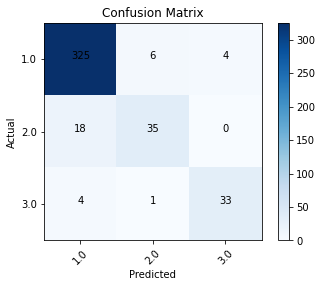

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Feature Importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Feature: 0, Score: 0.04979
Feature: 1, Score: 0.02151
Feature: 2, Score: 0.00027
Feature: 3, Score: 0.01493
Feature: 4, Score: 0.01868
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.19229
Feature: 7, Score: 0.18938
Feature: 8, Score: 0.36622
Feature: 9, Score: 0.14692
Feature: 10, Score: 0.00000


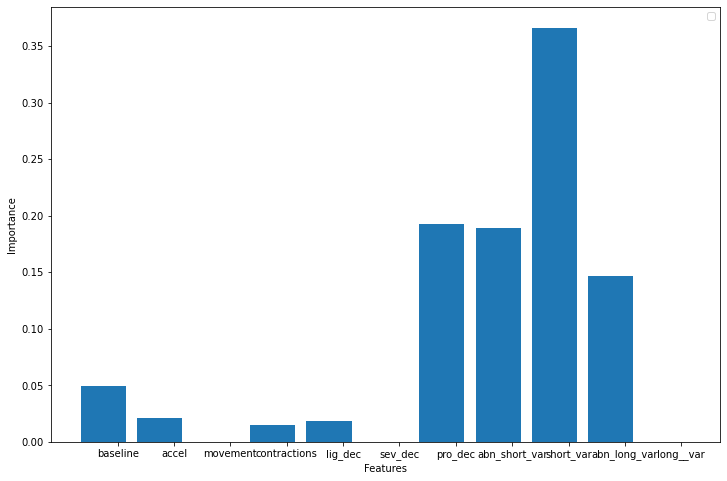

In [ ]:
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

barWidth = 0.25
fig = plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks([r + barWidth for r in range(11)],
        ['baseline', 'accel', 'movement',
       'contractions', 'lig_dec', 'sev_dec',
       'pro_dec', 'abn_short_var',
       'short_var',
       'abn_long_var',
       'long__var'])

plt.legend()
plt.show()

In [ ]:
coeff = pd.DataFrame({'coeff': importance}, index=X_df.columns)
coeff.sort_values(by=['coeff'], ascending=False)

,coeff
mean_value_of_short_term_variability,0.366225
prolongued_decelerations,0.192287
abnormal_short_term_variability,0.189383
percentage_of_time_with_abnormal_long_term_variability,0.146915
baseline value,0.049788
accelerations,0.021512
light_decelerations,0.018683
uterine_contractions,0.014934
fetal_movement,0.000272
severe_decelerations,0.000000


In [ ]:
SOC_dt = 13

## Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier().fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

gb_classification = classification_report(y_test, y_test_pred)
print(gb_classification)

Training score: 0.9805882352941176
Test score: 0.9483568075117371
RMSE: 0.2697590648182989
Model accuracy on testing set:  0.9483568075117371
Model accuracy on training set:  0.9805882352941176
Model precision on test set: 0.95
Model recall on test set: 0.95
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       335
         2.0       0.87      0.75      0.81        53
         3.0       0.97      0.89      0.93        38

    accuracy                           0.95       426
   macro avg       0.93      0.88      0.90       426
weighted avg       0.95      0.95      0.95       426



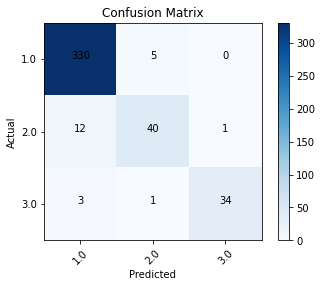

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
parameters={
    'criterion': ['friedman_mse', 'squared_error'],
}

clf = GridSearchCV(GradientBoostingClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_criterion', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['criterion'])
print("Best: %f" % clf.best_score_)

  param_criterion  mean_test_score  mean_train_score
0    friedman_mse         0.930588          0.983235
1   squared_error         0.931765          0.983676
Best parameters set found on development set:
squared_error
Best: 0.931765


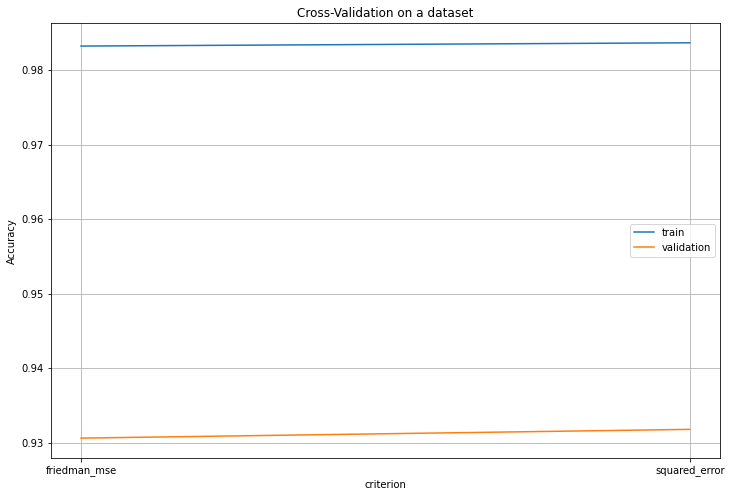

In [ ]:
index = np.arange(1, 3)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('criterion')
plt.xticks(index, result['param_criterion'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters={
    'max_depth': [1,2,3,4,5,6,7,8,9,10,20,30],
    'criterion': ['squared_error']
}

clf = GridSearchCV(GradientBoostingClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_max_depth', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['max_depth'])
print("Best: %f" % clf.best_score_)

   param_max_depth  mean_test_score  mean_train_score
0                1         0.920000          0.932647
1                2         0.931765          0.960735
2                3         0.932353          0.983235
3                4         0.931176          0.998529
4                5         0.933529          0.999118
5                6         0.934118          0.999118
6                7         0.934118          0.999118
7                8         0.931176          0.999118
8                9         0.932353          0.999118
9               10         0.927647          0.999118
10              20         0.922353          0.999118
11              30         0.921176          0.999118
Best parameters set found on development set:
6
Best: 0.934118


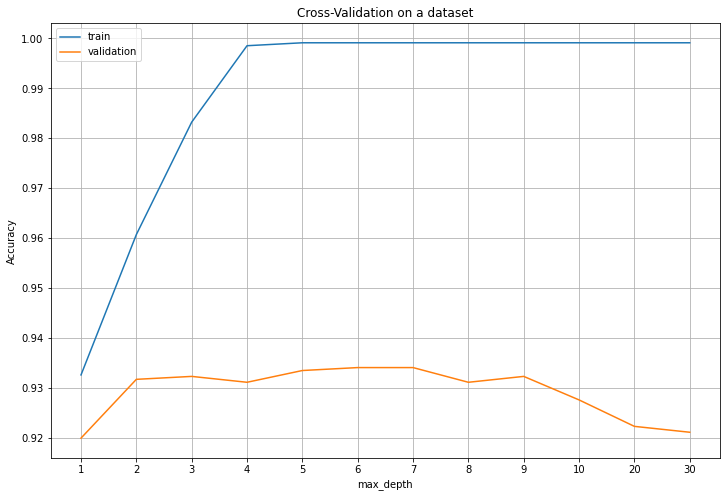

In [ ]:
index = np.arange(1, 13)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.xticks(index, result['param_max_depth'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters={
    'criterion': ['squared_error'],
    'max_depth': [6],
    'min_samples_leaf': [5,10,20,30,40,50,100] 
}

clf = GridSearchCV(GradientBoostingClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_min_samples_leaf', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['min_samples_leaf'])
print("Best: %f" % clf.best_score_)

  param_min_samples_leaf  mean_test_score  mean_train_score
0                      5         0.934118          0.999118
1                     10         0.936471          0.999118
2                     20         0.933529          0.998824
3                     30         0.937647          0.996912
4                     40         0.927059          0.992647
5                     50         0.924706          0.988088
6                    100         0.917647          0.970588
Best parameters set found on development set:
30
Best: 0.937647


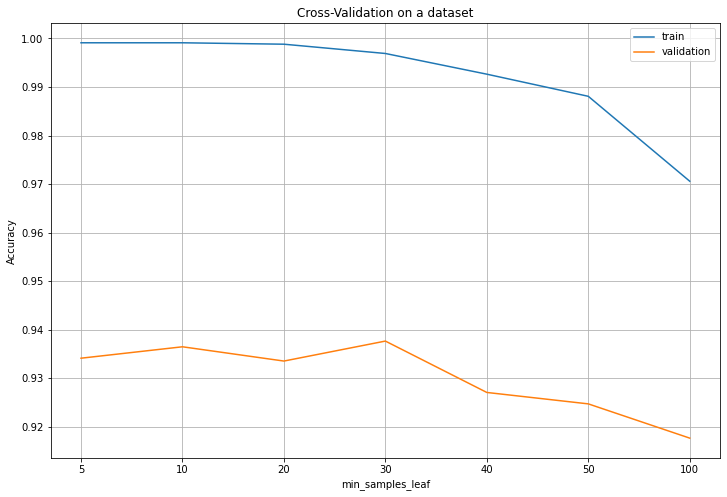

In [ ]:
index = np.arange(1, 8)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leaf')
plt.xticks(index, result['param_min_samples_leaf'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
model = GradientBoostingClassifier(max_depth=6, min_samples_leaf=30, criterion='squared_error').fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

gb_best_classification = classification_report(y_test, y_test_pred)
print(gb_best_classification)

Training score: 0.9952941176470588
Test score: 0.9460093896713615
RMSE: 0.26091208743730526
Model accuracy on testing set:  0.9460093896713615
Model accuracy on training set:  0.9952941176470588
Model precision on test set: 0.95
Model recall on test set: 0.95
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       335
         2.0       0.81      0.79      0.80        53
         3.0       1.00      0.89      0.94        38

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.95      0.95      0.95       426



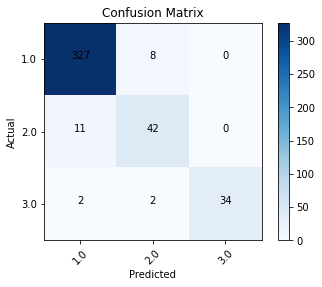

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Global Optimization

In [ ]:
parameters={
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,20,30],
    'min_samples_leaf': [5,10,20,30,40,50,100] 
}

clf = GridSearchCV(GradientBoostingClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'criterion': 'squared_error', 'max_depth': 9, 'min_samples_leaf': 30}


In [ ]:
model = GradientBoostingClassifier(max_depth=9, min_samples_leaf=30, criterion='squared_error').fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

gb_best_classification = classification_report(y_test, y_test_pred)
print(gb_best_classification)

Training score: 0.9988235294117647
Test score: 0.9366197183098591
RMSE: 0.2783249696530916
Model accuracy on testing set:  0.9366197183098591
Model accuracy on training set:  0.9988235294117647
Model precision on test set: 0.94
Model recall on test set: 0.94
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.96       335
         2.0       0.76      0.77      0.77        53
         3.0       1.00      0.89      0.94        38

    accuracy                           0.94       426
   macro avg       0.91      0.88      0.89       426
weighted avg       0.94      0.94      0.94       426



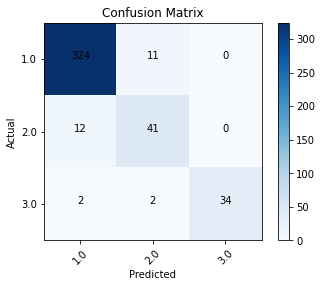

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Feature Importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Feature: 0, Score: 0.08510
Feature: 1, Score: 0.04946
Feature: 2, Score: 0.01086
Feature: 3, Score: 0.04162
Feature: 4, Score: 0.01989
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.12699
Feature: 7, Score: 0.24228
Feature: 8, Score: 0.19490
Feature: 9, Score: 0.17864
Feature: 10, Score: 0.05025


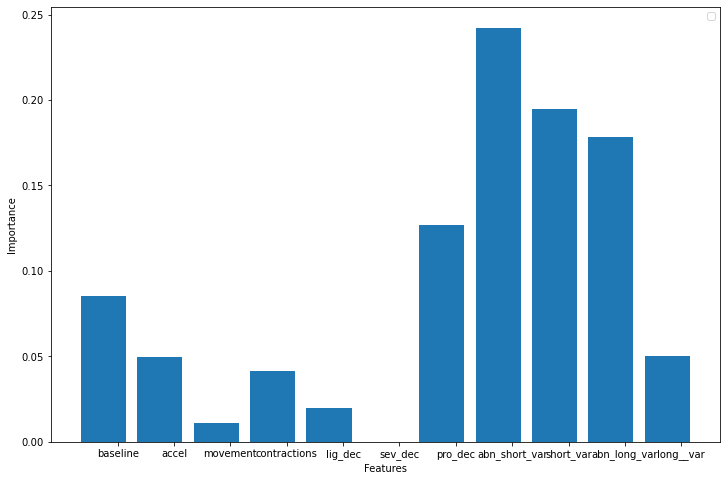

In [ ]:
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

barWidth = 0.25
fig = plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks([r + barWidth for r in range(11)],
        ['baseline', 'accel', 'movement',
       'contractions', 'lig_dec', 'sev_dec',
       'pro_dec', 'abn_short_var',
       'short_var',
       'abn_long_var',
       'long__var'])

plt.legend()
plt.show()

In [ ]:
coeff = pd.DataFrame({'coeff': importance}, index=X_df.columns)
coeff.sort_values(by=['coeff'], ascending=False)

,coeff
abnormal_short_term_variability,0.242279
mean_value_of_short_term_variability,0.194896
percentage_of_time_with_abnormal_long_term_variability,0.178644
prolongued_decelerations,0.126990
baseline value,0.085103
mean_value_of_long_term_variability,0.050252
accelerations,0.049457
uterine_contractions,0.041625
light_decelerations,0.019890
fetal_movement,0.010864


## Random Forest Classifier

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_classification = classification_report(y_test, y_test_pred)
print(rf_classification)

Training score: 0.9988235294117647
Test score: 0.9460093896713615
RMSE: 0.2470483026652182
Model accuracy on testing set:  0.9460093896713615
Model accuracy on training set:  0.9988235294117647
Model precision on test set: 0.95
Model recall on test set: 0.95
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       335
         2.0       0.80      0.77      0.79        53
         3.0       1.00      0.92      0.96        38

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.91       426
weighted avg       0.95      0.95      0.95       426



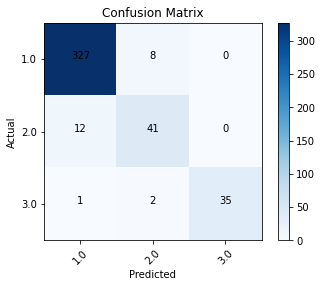

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
parameters={
    'criterion': ['gini', 'entropy'],
}

clf = GridSearchCV(RandomForestClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_criterion', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['criterion'])
print("Best: %f" % clf.best_score_)

  param_criterion  mean_test_score  mean_train_score
0            gini         0.934706          0.999118
1         entropy         0.935294          0.999118
Best parameters set found on development set:
entropy
Best: 0.935294


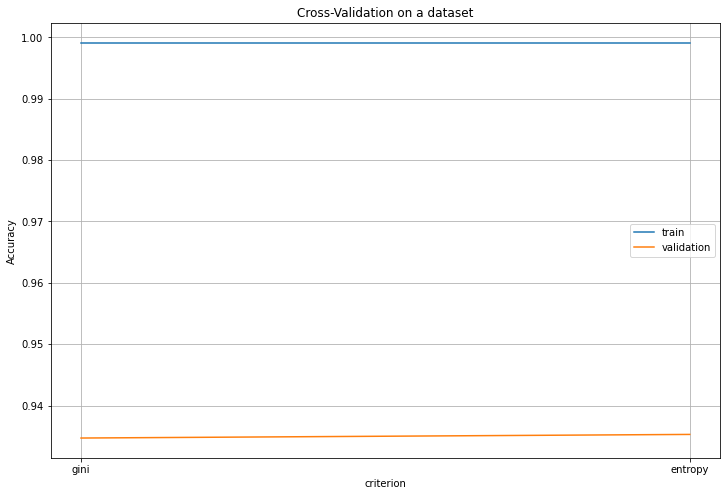

In [ ]:
index = np.arange(1, 3)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('criterion')
plt.xticks(index, result['param_criterion'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)

parameters={
    'max_depth': [1,2,3,4,5,6,7,8,9,10,20,30],
    'criterion': ['entropy']
}

clf = GridSearchCV(model, parameters, cv=5, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_max_depth', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['max_depth'])
print("Best: %f" % clf.best_score_)

   param_max_depth  mean_test_score  mean_train_score
0                1         0.776471          0.776471
1                2         0.852353          0.854706
2                3         0.885882          0.892353
3                4         0.894118          0.916471
4                5         0.920000          0.939706
5                6         0.925294          0.953529
6                7         0.927647          0.964412
7                8         0.931765          0.975000
8                9         0.932353          0.982794
9               10         0.931176          0.990441
10              20         0.934706          0.999118
11              30         0.937059          0.999118
Best parameters set found on development set:
30
Best: 0.937059


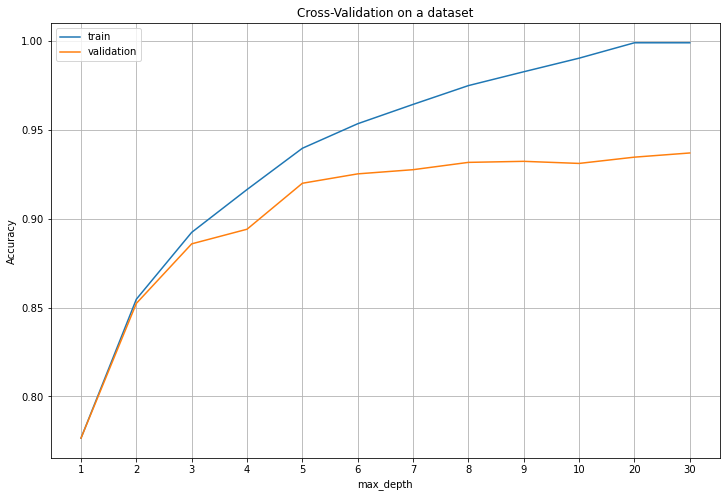

In [ ]:
index = np.arange(1, 13)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.xticks(index, result['param_max_depth'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters={
    'criterion': ['entropy'],
    'max_depth': [30],
    'min_samples_leaf': [5,10,20,30,40,50,100] 
}

clf = GridSearchCV(RandomForestClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_min_samples_leaf', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['min_samples_leaf'])
print("Best: %f" % clf.best_score_)

  param_min_samples_leaf  mean_test_score  mean_train_score
0                      5         0.920000          0.962353
1                     10         0.912941          0.938382
2                     20         0.894118          0.911324
3                     30         0.880000          0.893235
4                     40         0.861765          0.873382
5                     50         0.848824          0.854559
6                    100         0.851176          0.852647
Best parameters set found on development set:
5
Best: 0.920000


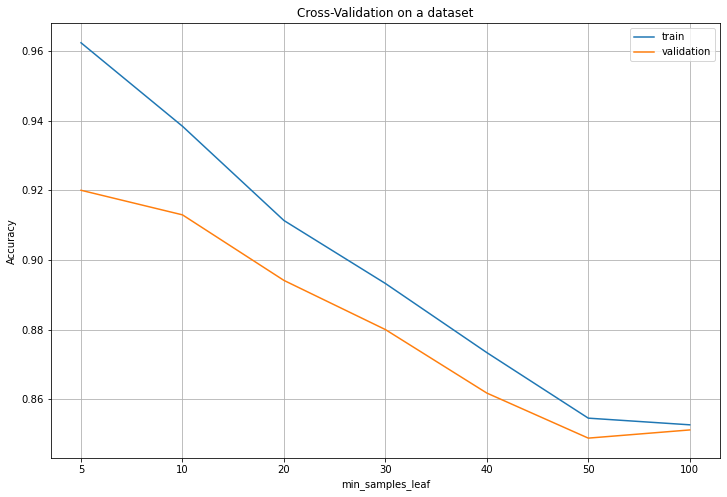

In [ ]:
index = np.arange(1, 8)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leaf')
plt.xticks(index, result['param_min_samples_leaf'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, criterion='entropy').fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_best_classification = classification_report(y_test, y_test_pred)
print(rf_best_classification)

Training score: 0.9629411764705882
Test score: 0.9413145539906104
RMSE: 0.30642570651794776
Model accuracy on testing set:  0.9413145539906104
Model accuracy on training set:  0.9629411764705882
Model precision on test set: 0.94
Model recall on test set: 0.94
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       335
         2.0       0.87      0.74      0.80        53
         3.0       0.97      0.89      0.93        38

    accuracy                           0.94       426
   macro avg       0.93      0.87      0.90       426
weighted avg       0.94      0.94      0.94       426



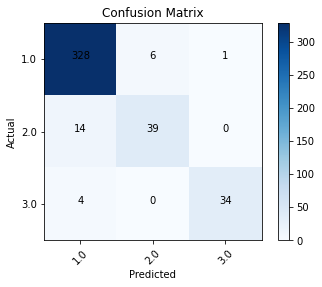

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Global Optimization

In [ ]:
parameters={
    'criterion': ['entropy', 'gini'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,20,30],
    'min_samples_leaf': [5,10,20,30,40,50,100] 
}

clf = GridSearchCV(RandomForestClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}


In [ ]:
model = RandomForestClassifier(max_depth=20, min_samples_leaf=5, criterion='gini').fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_best_classification = classification_report(y_test, y_test_pred)
print(rf_best_classification)

Training score: 0.9605882352941176
Test score: 0.9436619718309859
RMSE: 0.29070094986690553
Model accuracy on testing set:  0.9436619718309859
Model accuracy on training set:  0.9605882352941176
Model precision on test set: 0.94
Model recall on test set: 0.94
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       335
         2.0       0.87      0.74      0.80        53
         3.0       0.97      0.87      0.92        38

    accuracy                           0.94       426
   macro avg       0.93      0.86      0.89       426
weighted avg       0.94      0.94      0.94       426



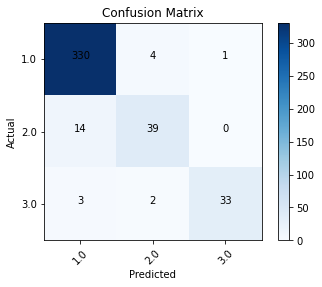

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Feature Importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Feature: 0, Score: 0.08849
Feature: 1, Score: 0.07427
Feature: 2, Score: 0.02133
Feature: 3, Score: 0.04543
Feature: 4, Score: 0.02449
Feature: 5, Score: 0.00072
Feature: 6, Score: 0.10230
Feature: 7, Score: 0.22075
Feature: 8, Score: 0.16120
Feature: 9, Score: 0.17653
Feature: 10, Score: 0.08450


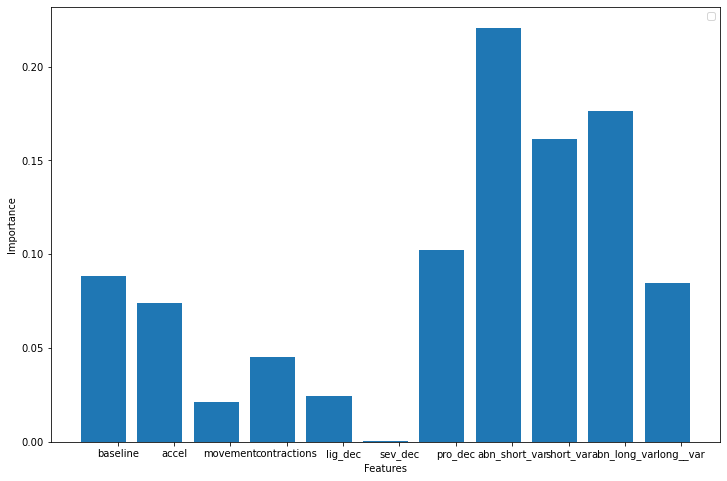

In [ ]:
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

barWidth = 0.25
fig = plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks([r + barWidth for r in range(11)],
        ['baseline', 'accel', 'movement',
       'contractions', 'lig_dec', 'sev_dec',
       'pro_dec', 'abn_short_var',
       'short_var',
       'abn_long_var',
       'long__var'])

plt.legend()
plt.show()

In [ ]:
coeff = pd.DataFrame({'coeff': importance}, index=X_df.columns)
coeff.sort_values(by=['coeff'], ascending=False)

,coeff
abnormal_short_term_variability,0.220754
percentage_of_time_with_abnormal_long_term_variability,0.176528
mean_value_of_short_term_variability,0.161204
prolongued_decelerations,0.102303
baseline value,0.088486
mean_value_of_long_term_variability,0.084497
accelerations,0.074266
uterine_contractions,0.045429
light_decelerations,0.024487
fetal_movement,0.021329


In [ ]:
SOC_rf = 41

## MLP Classifier

In [ ]:
mlp = MLPClassifier().fit(X_train, y_train)

print('Training score: {}'.format(mlp.score(X_train, y_train)))
print('Test score: {}'.format(mlp.score(X_test, y_test)))

y_test_pred = mlp.predict(X_test)
y_train_pred = mlp.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

MLP_classification = classification_report(y_test, y_test_pred)
print(MLP_classification)

Training score: 0.9435294117647058
Test score: 0.8967136150234741
RMSE: 0.3721527274952578
Model accuracy on testing set:  0.8967136150234741
Model accuracy on training set:  0.9435294117647058
Model precision on test set: 0.89
Model recall on test set: 0.9
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       335
         2.0       0.64      0.60      0.62        53
         3.0       0.91      0.84      0.88        38

    accuracy                           0.90       426
   macro avg       0.83      0.80      0.81       426
weighted avg       0.89      0.90      0.90       426



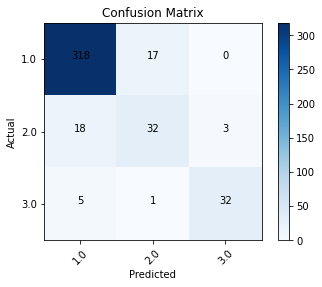

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
parameters={
    'hidden_layer_sizes': [(50,), (50, 50,), (50, 50, 50,), (50, 50, 50, 50,), (50, 50, 50, 50, 50,), (50, 50, 50, 50, 50, 50, ), (50, 50, 50, 50, 50, 50, 50,), (50, 50, 50, 50, 50, 50, 50, 50,)]
}

clf = GridSearchCV(MLPClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_hidden_layer_sizes', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['hidden_layer_sizes'])
print("Best: %f" % clf.best_score_)

           param_hidden_layer_sizes  mean_test_score  mean_train_score
0                             (50,)         0.908235          0.925882
1                          (50, 50)         0.910588          0.969853
2                      (50, 50, 50)         0.920588          0.989853
3                  (50, 50, 50, 50)         0.912353          0.990735
4              (50, 50, 50, 50, 50)         0.911176          0.994853
5          (50, 50, 50, 50, 50, 50)         0.912941          0.991912
6      (50, 50, 50, 50, 50, 50, 50)         0.911765          0.985735
7  (50, 50, 50, 50, 50, 50, 50, 50)         0.900000          0.985735
Best parameters set found on development set:
(50, 50, 50)
Best: 0.920588


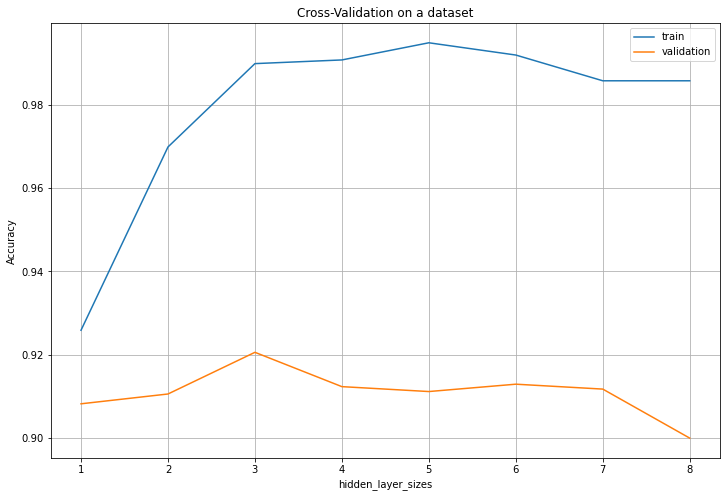

In [ ]:
index = np.arange(1, 9)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('hidden_layer_sizes')

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters={
    'hidden_layer_sizes': [(1, 1, 1), (2,2,2), (4,4,4), (8,8,8), (16,16,16), (32,32,32), (64,64,64), (128,128,128), (256,256,256), (512,512,512), (1024,1024,1024)]
}

clf = GridSearchCV(MLPClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_hidden_layer_sizes', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['hidden_layer_sizes'])
print("Best: %f" % clf.best_score_)

   param_hidden_layer_sizes  mean_test_score  mean_train_score
0                 (1, 1, 1)         0.776471          0.776471
1                 (2, 2, 2)         0.831176          0.838971
2                 (4, 4, 4)         0.839412          0.859559
3                 (8, 8, 8)         0.888235          0.911912
4              (16, 16, 16)         0.900588          0.938971
5              (32, 32, 32)         0.911765          0.979559
6              (64, 64, 64)         0.913529          0.992353
7           (128, 128, 128)         0.916471          0.995735
8           (256, 256, 256)         0.906471          0.988971
9           (512, 512, 512)         0.917647          0.992500
10       (1024, 1024, 1024)         0.913529          0.992941
Best parameters set found on development set:
(512, 512, 512)
Best: 0.917647


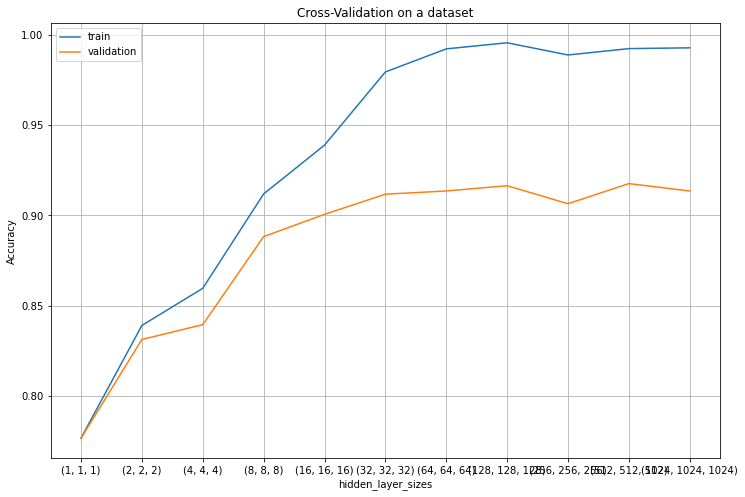

In [ ]:
index = np.arange(1, 12)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('hidden_layer_sizes')
plt.xticks(index, result['param_hidden_layer_sizes'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters={
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(512,512,512)]
}

clf = GridSearchCV(MLPClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_activation', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['activation'])
print("Best: %f" % clf.best_score_)

  param_activation  mean_test_score  mean_train_score
0         identity         0.876471          0.886765
1         logistic         0.885294          0.894118
2             tanh         0.924706          0.996324
3             relu         0.914118          0.990882
Best parameters set found on development set:
tanh
Best: 0.924706


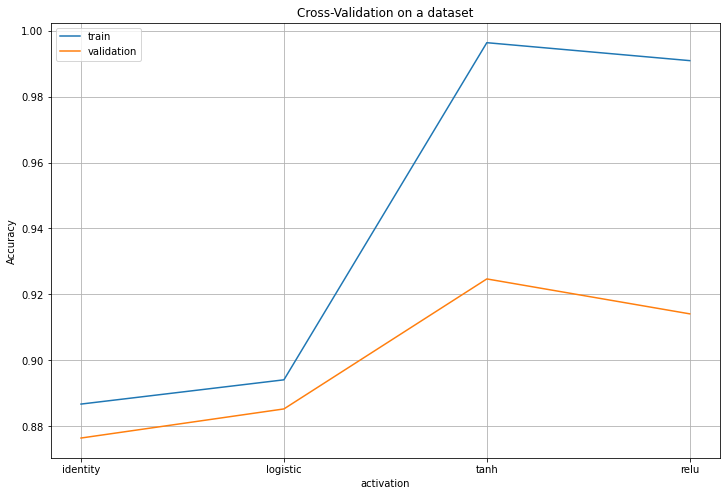

In [ ]:
index = np.arange(1, 5)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('activation')
plt.xticks(index, result['param_activation'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters={
    'solver': ['lbfgs', 'sgd', 'adam'],
    'activation': ['tanh'],
    'hidden_layer_sizes': [(512,512,512)]
}

clf = GridSearchCV(MLPClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_solver', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['solver'])
print("Best: %f" % clf.best_score_)

  param_solver  mean_test_score  mean_train_score
0        lbfgs         0.912353          0.999118
1          sgd         0.881176          0.891324
2         adam         0.920000          0.996912
Best parameters set found on development set:
adam
Best: 0.920000


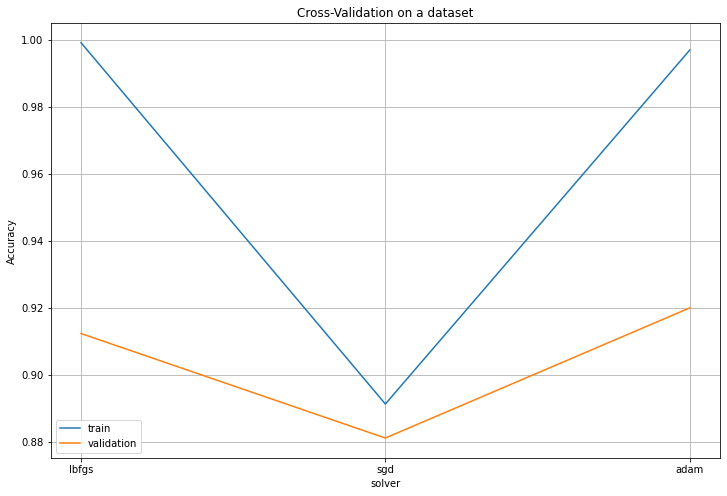

In [ ]:
index = np.arange(1, 4)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('solver')
plt.xticks(index, result['param_solver'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
mlp = MLPClassifier(solver='adam', activation='tanh', hidden_layer_sizes=(512,512,512)).fit(X_train, y_train)

print('Training score: {}'.format(mlp.score(X_train, y_train)))
print('Test score: {}'.format(mlp.score(X_test, y_test)))

y_test_pred = mlp.predict(X_test)
y_train_pred = mlp.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

MLP_best_classification = classification_report(y_test, y_test_pred)
print(MLP_best_classification)

Training score: 0.9958823529411764
Test score: 0.9248826291079812
RMSE: 0.31023238298958905
Model accuracy on testing set:  0.9248826291079812
Model accuracy on training set:  0.9958823529411764
Model precision on test set: 0.92
Model recall on test set: 0.92
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.96       335
         2.0       0.75      0.68      0.71        53
         3.0       0.83      0.89      0.86        38

    accuracy                           0.92       426
   macro avg       0.85      0.85      0.85       426
weighted avg       0.92      0.92      0.92       426



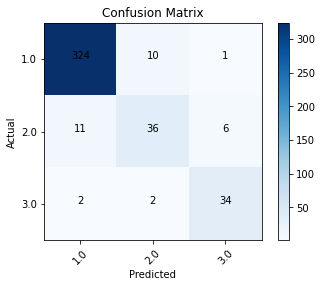

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Global Optimization

In [ ]:
parameters={
    'solver': ['lbfgs', 'sgd', 'adam'],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(512), (512,512),(512,512,512), (512,512,512,512), (512,512,512,512,512)]
}

clf = GridSearchCV(MLPClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'tanh', 'hidden_layer_sizes': (512, 512, 512), 'solver': 'adam'}


In [ ]:
model = MLPClassifier(solver='adam', activation='tanh', hidden_layer_sizes=(512,512,512)).fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

MLP_best_global_classification = classification_report(y_test, y_test_pred)
print(MLP_best_global_classification)

Training score: 0.9947058823529412
Test score: 0.9225352112676056
RMSE: 0.30257114167522303
Model accuracy on testing set:  0.9225352112676056
Model accuracy on training set:  0.9947058823529412
Model precision on test set: 0.92
Model recall on test set: 0.92
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       335
         2.0       0.73      0.66      0.69        53
         3.0       0.89      0.89      0.89        38

    accuracy                           0.92       426
   macro avg       0.86      0.84      0.85       426
weighted avg       0.92      0.92      0.92       426



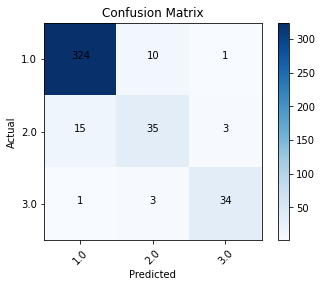

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM (SVC)

In [ ]:
model = SVC().fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_classification = classification_report(y_test, y_test_pred)
print(rf_classification)

Training score: 0.9147058823529411
Test score: 0.8967136150234741
RMSE: 0.34259435491376583
Model accuracy on testing set:  0.8967136150234741
Model accuracy on training set:  0.9147058823529411
Model precision on test set: 0.9
Model recall on test set: 0.9
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       335
         2.0       0.60      0.60      0.60        53
         3.0       0.94      0.79      0.86        38

    accuracy                           0.90       426
   macro avg       0.83      0.78      0.80       426
weighted avg       0.90      0.90      0.90       426



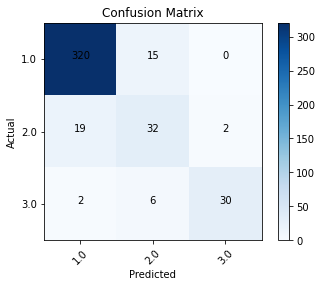

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
parameters = {'kernel': ['poly','rbf', 'sigmoid','linear']}

clf = GridSearchCV(SVC(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_kernel', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['kernel'])
print("Best: %f" % clf.best_score_)

  param_kernel  mean_test_score  mean_train_score
0         poly         0.895882          0.916471
1          rbf         0.900588          0.915588
2      sigmoid         0.799412          0.805735
3       linear         0.885294          0.893676
Best parameters set found on development set:
rbf
Best: 0.900588


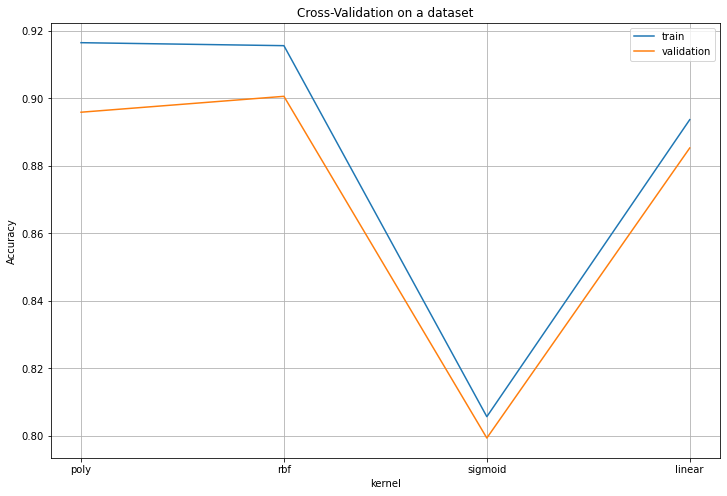

In [ ]:
index = np.arange(1, 5)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('kernel')
plt.xticks(index, result['param_kernel'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters = {
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

clf = GridSearchCV(SVC(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_gamma', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['gamma'])
print("Best: %f" % clf.best_score_)

  param_gamma  mean_test_score  mean_train_score
0       scale         0.900588          0.915588
1        auto         0.900000          0.915294
Best parameters set found on development set:
scale
Best: 0.900588


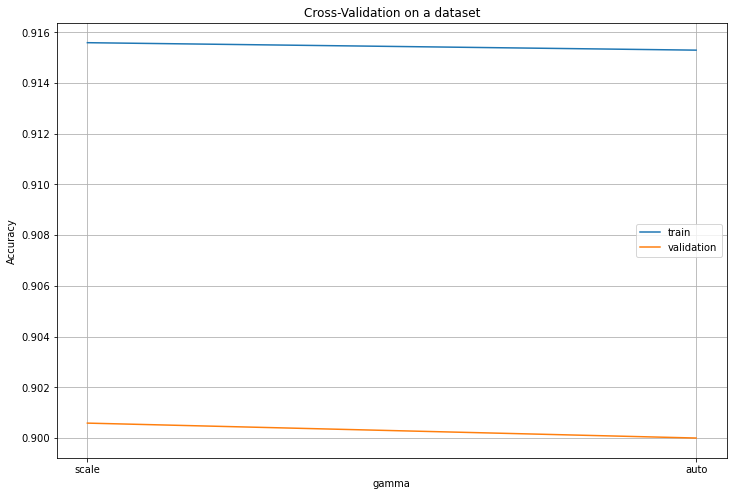

In [ ]:
index = np.arange(1, 3)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('gamma')
plt.xticks(index, result['param_gamma'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters = {
    'kernel': ['rbf'],
    'gamma': ['scale'],
    'C': 10. ** np.arange(-3, 3)
}

clf = GridSearchCV(SVC(),parameters,return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_C', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['C'])
print("Best: %f" % clf.best_score_)

  param_C  mean_test_score  mean_train_score
0   0.001         0.776471          0.776471
1    0.01         0.776471          0.776471
2     0.1         0.878824          0.881324
3     1.0         0.900588          0.915588
4    10.0         0.905294          0.947059
5   100.0         0.917647          0.971618
Best parameters set found on development set:
100.0
Best: 0.917647


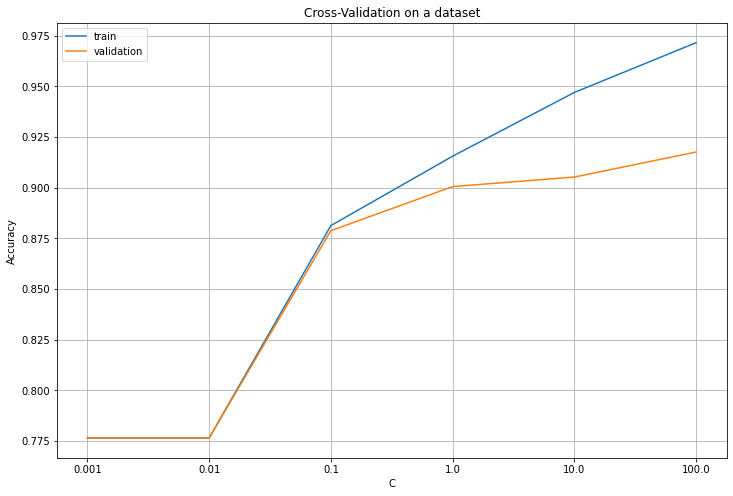

In [ ]:
index = np.arange(1, 7)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.xticks(index, result['param_C'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
model = SVC(gamma='scale', C=100, kernel='rbf').fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_best_classification = classification_report(y_test, y_test_pred)
print(rf_best_classification)

Training score: 0.9711764705882353
Test score: 0.9084507042253521
RMSE: 0.356034497458156
Model accuracy on testing set:  0.9084507042253521
Model accuracy on training set:  0.9711764705882353
Model precision on test set: 0.91
Model recall on test set: 0.91
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       335
         2.0       0.69      0.64      0.67        53
         3.0       0.85      0.87      0.86        38

    accuracy                           0.91       426
   macro avg       0.83      0.82      0.82       426
weighted avg       0.91      0.91      0.91       426



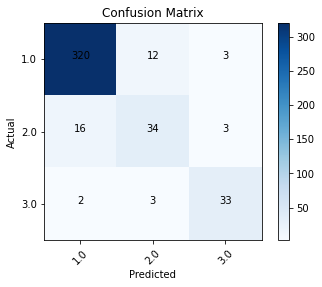

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Global Optimization

In [ ]:
parameters = {
    'kernel': ['poly','rbf', 'sigmoid','linear'],
    'gamma': ['scale', 'auto'],
    'C': 10. ** np.arange(-3, 2)
}

clf = GridSearchCV(SVC(),parameters,return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
model = SVC(gamma='scale', C=10, kernel='rbf').fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_best_classification = classification_report(y_test, y_test_pred)
print(rf_best_classification)

Training score: 0.9441176470588235
Test score: 0.9131455399061033
RMSE: 0.3177089346180718
Model accuracy on testing set:  0.9131455399061033
Model accuracy on training set:  0.9441176470588235
Model precision on test set: 0.92
Model recall on test set: 0.91
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       335
         2.0       0.66      0.72      0.68        53
         3.0       0.92      0.87      0.89        38

    accuracy                           0.91       426
   macro avg       0.84      0.84      0.84       426
weighted avg       0.92      0.91      0.91       426



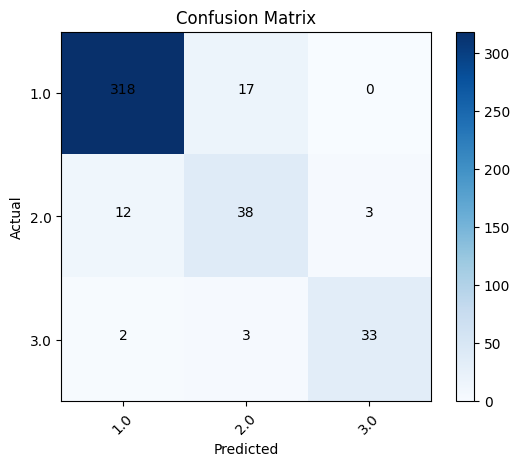

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
model.n_support_

array([204, 155,  67], dtype=int32)

In [ ]:
SOC_svc = 4692

## KNN

In [ ]:
model = KNeighborsClassifier().fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_classification = classification_report(y_test, y_test_pred)
print(rf_classification)

Training score: 0.9411764705882353
Test score: 0.903755868544601
RMSE: 0.34259435491376583
Model accuracy on testing set:  0.903755868544601
Model accuracy on training set:  0.9411764705882353
Model precision on test set: 0.9
Model recall on test set: 0.9
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       335
         2.0       0.65      0.62      0.63        53
         3.0       0.97      0.89      0.93        38

    accuracy                           0.90       426
   macro avg       0.85      0.82      0.84       426
weighted avg       0.90      0.90      0.90       426



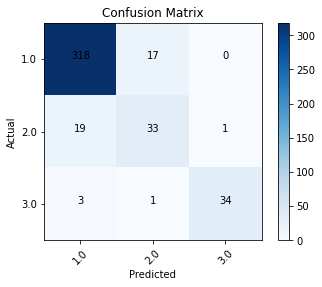

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
parameters = {'weights': ['uniform','distance']}

clf = GridSearchCV(KNeighborsClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_weights', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['weights'])
print("Best: %f" % clf.best_score_)

  param_weights  mean_test_score  mean_train_score
0       uniform         0.901765          0.939559
1      distance         0.910588          0.999118
Best parameters set found on development set:
distance
Best: 0.910588


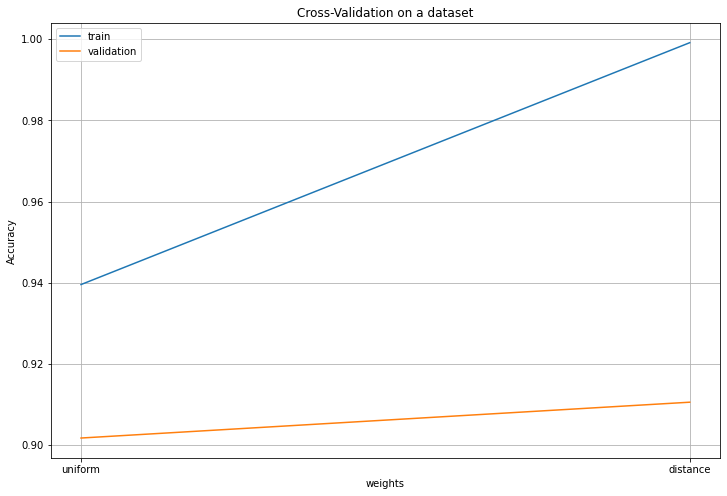

In [ ]:
index = np.arange(1, 3)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('weights')
plt.xticks(index, result['param_weights'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters = {
    'weights': ['distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

clf = GridSearchCV(KNeighborsClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_algorithm', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['algorithm'])
print("Best: %f" % clf.best_score_)

  param_algorithm  mean_test_score  mean_train_score
0            auto         0.910588          0.999118
1       ball_tree         0.910588          0.999118
2         kd_tree         0.910588          0.999118
3           brute         0.910588          0.999118
Best parameters set found on development set:
auto
Best: 0.910588


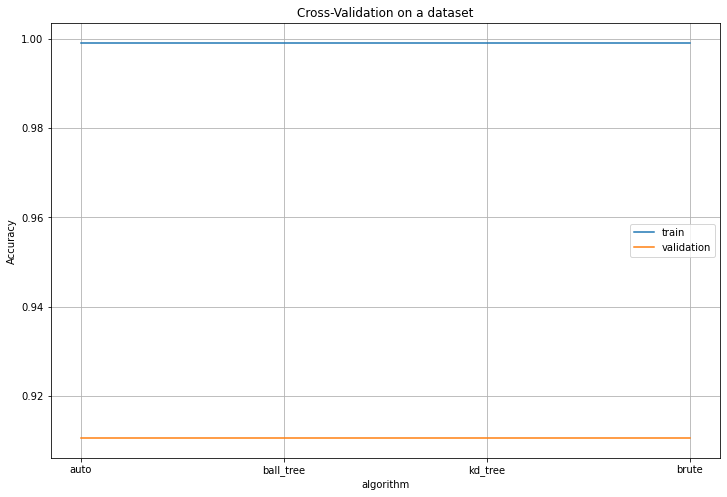

In [ ]:
index = np.arange(1, 5)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('algorithm')
plt.xticks(index, result['param_algorithm'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters = {
    'weights': ['distance'],
    'algorithm': ['auto'],
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10]
}

clf = GridSearchCV(KNeighborsClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_n_neighbors', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['n_neighbors'])
print("Best: %f" % clf.best_score_)

  param_n_neighbors  mean_test_score  mean_train_score
0                 1         0.912353          0.999118
1                 2         0.912353          0.999118
2                 3         0.917059          0.999118
3                 4         0.914118          0.999118
4                 5         0.910588          0.999118
5                 6         0.907647          0.999118
6                 7         0.907059          0.999118
7                 8         0.905882          0.999118
8                 9         0.904706          0.999118
9                10         0.905882          0.999118
Best parameters set found on development set:
3
Best: 0.917059


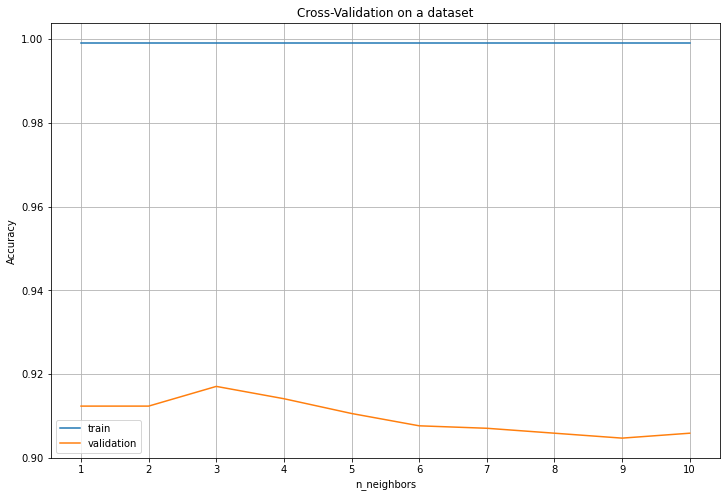

In [ ]:
index = np.arange(1, 11)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.xticks(index, result['param_n_neighbors'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
parameters = {
    'weights': ['distance'],
    'algorithm': ['auto'],
    'n_neighbors': [3],
    'leaf_size': [1,2,3,4,5,6,7,8,9,10,20,30,40,50]
}

clf = GridSearchCV(KNeighborsClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

result = pd.DataFrame(clf.cv_results_)
result = result[['param_leaf_size', 'mean_test_score', 'mean_train_score']]
print(result)

print("Best parameters set found on development set:")
print(clf.best_params_['leaf_size'])
print("Best: %f" % clf.best_score_)

   param_leaf_size  mean_test_score  mean_train_score
0                1         0.917059          0.999118
1                2         0.917059          0.999118
2                3         0.917059          0.999118
3                4         0.917059          0.999118
4                5         0.917059          0.999118
5                6         0.917059          0.999118
6                7         0.917059          0.999118
7                8         0.917059          0.999118
8                9         0.917059          0.999118
9               10         0.917059          0.999118
10              20         0.917059          0.999118
11              30         0.917059          0.999118
12              40         0.917059          0.999118
13              50         0.917059          0.999118
Best parameters set found on development set:
1
Best: 0.917059


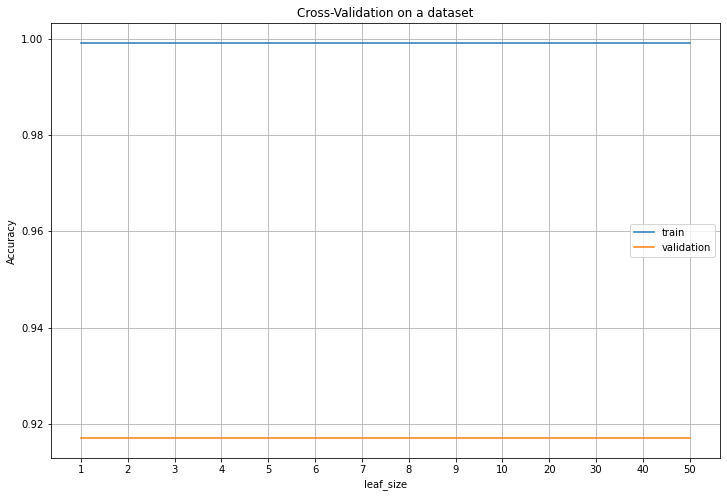

In [ ]:
index = np.arange(1, 15)
    
fig = plt.figure(figsize=(12,8))
plt.title('Cross-Validation on a dataset') 
plt.ylabel('Accuracy')
plt.xlabel('leaf_size')
plt.xticks(index, result['param_leaf_size'])

line1, = plt.plot(index, result['mean_train_score'], label="train")
line2, = plt.plot(index, result['mean_test_score'], label="validation")

plt.grid()
plt.legend()
plt.show()

In [ ]:
model = KNeighborsClassifier(leaf_size=1, weights='distance', n_neighbors=3, algorithm='auto').fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_best_classification = classification_report(y_test, y_test_pred)
print(rf_best_classification)

Training score: 0.9988235294117647
Test score: 0.9225352112676056
RMSE: 0.30257114167522303
Model accuracy on testing set:  0.9225352112676056
Model accuracy on training set:  0.9988235294117647
Model precision on test set: 0.92
Model recall on test set: 0.92
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       335
         2.0       0.71      0.70      0.70        53
         3.0       0.92      0.87      0.89        38

    accuracy                           0.92       426
   macro avg       0.86      0.84      0.85       426
weighted avg       0.92      0.92      0.92       426



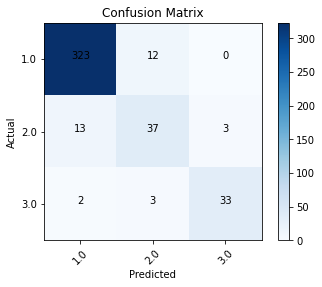

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Global Optimization

In [ ]:
parameters = {
    'weights': ['uniform','distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree','brute'],
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'leaf_size': [1,2,3,4,5,6,7,8,9,10,20,30,40,50]
}

clf = GridSearchCV(KNeighborsClassifier(), parameters, return_train_score=True, refit=False)
result = clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
model = KNeighborsClassifier(leaf_size=1, weights='distance', n_neighbors=3, algorithm='auto').fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

#accuracy
print('Model accuracy on testing set: ', accuracy_score(y_test, y_test_pred))
print('Model accuracy on training set: ', accuracy_score(y_train, y_train_pred))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

rf_best_classification = classification_report(y_test, y_test_pred)
print(rf_best_classification)

Training score: 0.9988235294117647
Test score: 0.9225352112676056
RMSE: 0.30257114167522303
Model accuracy on testing set:  0.9225352112676056
Model accuracy on training set:  0.9988235294117647
Model precision on test set: 0.92
Model recall on test set: 0.92
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       335
         2.0       0.71      0.70      0.70        53
         3.0       0.92      0.87      0.89        38

    accuracy                           0.92       426
   macro avg       0.86      0.84      0.85       426
weighted avg       0.92      0.92      0.92       426



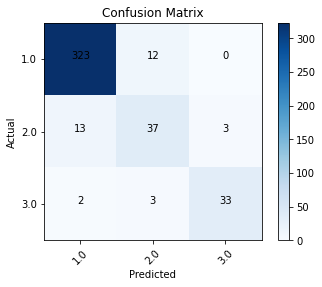

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
SOC_knn = 3*11*1700

## Comparison

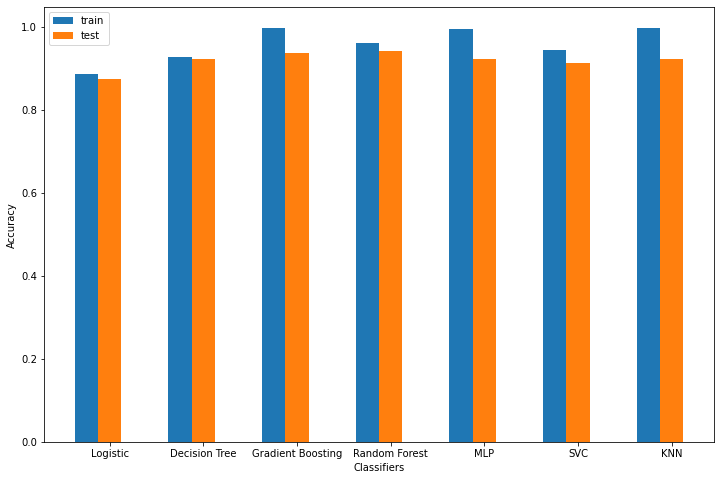

In [ ]:
train = [0.8864705882352941, 0.9276470588235294, 0.9988235294117647, 0.9605882352941176, 0.9947058823529412, 0.9441176470588235, 0.9988235294117647]
test = [0.8755868544600939, 0.9225352112676056, 0.9366197183098591, 0.9436619718309859, 0.9225352112676056, 0.9131455399061033, 0.9225352112676056]

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
br1 = np.arange(len(train))
br2 = [x + barWidth for x in br1]
 
plt.bar(br1, train, width = barWidth, label ='train')
plt.bar(br2, test, width = barWidth, label ='test')

# for i in range(len(br1)):
#     plt.text(i,train[i],train[i])
 
# for i in range(len(br2)):
#     plt.text(i+barWidth,test[i]-0.1,test[i])
 
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks([r + barWidth for r in range(len(train))],
        ['Logistic', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'MLP', 'SVC', 'KNN'])

plt.legend()
plt.show()

In [ ]:
d = {'Logistic Regression': ['accelerations', 'uterine_contractions', 'mean_value_of_short_term_variability'],
     'Decision Tree': ['mean_value_of_short_term_variability', 'prolongued_decelerations', 'abnormal_short_term_variability'],
     'Gradient Boosting': ['abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability'],
     'Random Forest': ['abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_short_term_variability']}
df = pd.DataFrame(data=d)
df

,Logistic Regression,Decision Tree,Gradient Boosting,Random Forest
0,accelerations,mean_value_of_short_term_variability,abnormal_short_term_variability,abnormal_short_term_variability
1,uterine_contractions,prolongued_decelerations,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_var...
2,mean_value_of_short_term_variability,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_var...,mean_value_of_short_term_variability


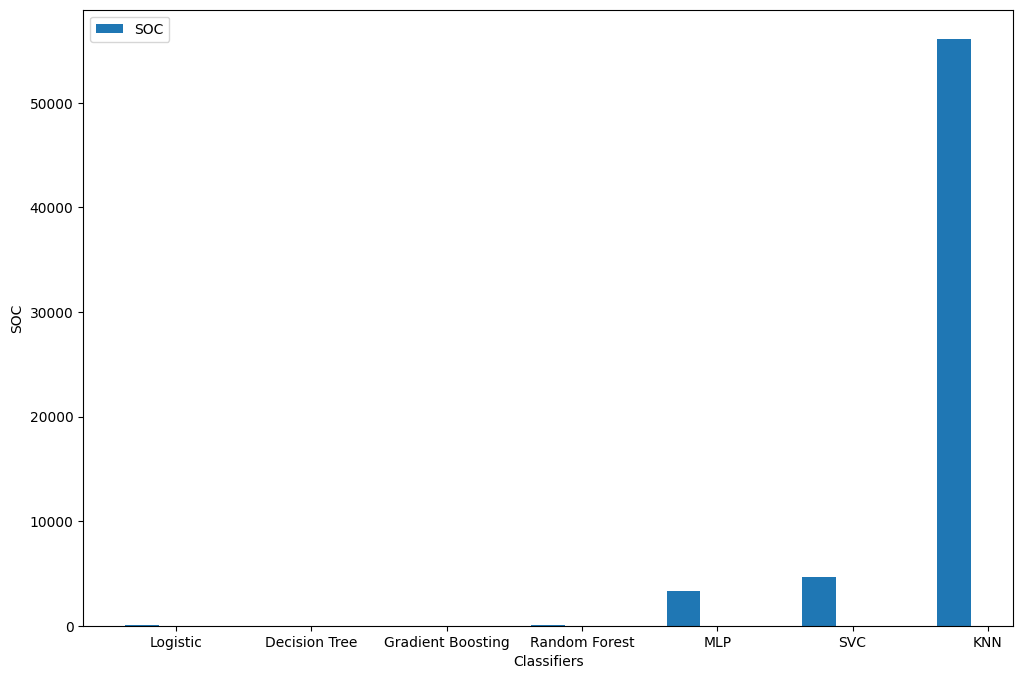

In [ ]:
models = ['Logistic', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'MLP', 'SVC', 'KNN']
soc = [22, 13, 19, 41, 3275, 4692, 56100]
    
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
br1 = np.arange(len(models))
 
plt.bar(br1, soc, width = barWidth, label ='SOC')

plt.xlabel('Classifiers')
plt.ylabel('SOC')
plt.xticks([r + barWidth for r in range(len(models))],
        models)

plt.legend()
plt.show()

In [ ]:
d = {'Logistic': [22],
'Decision Tree': [13],
'Gradient Boosting': [19],
'Random Forest': [41],
'MLP': [3275],
'SVC': [4692],
'KNN': [56100]}
df = pd.DataFrame(data=d)
df

,Logistic,Decision Tree,Gradient Boosting,Random Forest,MLP,SVC,KNN
0,22,13,19,41,3275,4692,56100
